#Imports

In [298]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import nltk
import spacy

In [299]:
df = pd.read_csv('NLP_project_kickoff_data.csv', encoding='utf-8')

In [300]:
df.head()

,Unnamed: 0,account,caption,profile_name,biography,id,following,likes,posts_count,followers,is_verified,datetime,image_url,url,comments,video_view_count,video_url,timestamp,adultScore,racyScore,goreScore,isBWImg,clipArtType,lineDrawingType,tokens
0,0,dr_hazem_alfie,"I am Dr Hazem Alfie, Plastic and Cosmetic Surg...",NaN,NaN,2.680000e+18,2,15,1,28,0,1634065389,j_kvihwg0g1c283e3byk.0f2035486e2f1b57c59707ec9...,https://www.instagram.com/p/CU8IoDEr-x3/,4,0,NaN,2021-11-02T19:40:32.981Z,0.001138,0.002034,0.000703,0,0,0,"['White', 'human', 'face', 'person', 'smile', ..."
1,1,british_face_clinic,British Face Clinic is offering free facial co...,British Face Clinic,"Facial Cosmetics, ENT and Thyroid Clinic by Mr...",1.920000e+18,106,10,4,56,0,1542635007,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqXTArshaKO/,0,0,NaN,2021-11-02T19:40:36.300Z,0.014004,0.016998,0.002984,0,0,0,"['White', 'Grey', 'text', 'human', 'face', 'fa..."
2,2,british_face_clinic,"Need fuller lips? Consider PermaLipâ„¢\n""Lip I...",British Face Clinic,"Facial Cosmetics, ENT and Thyroid Clinic by Mr...",1.920000e+18,106,9,4,56,0,1543377164,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqtakFwhYpo/,0,0,NaN,2021-11-02T19:40:36.300Z,0.002261,0.011085,0.011169,0,0,0,"['White', 'skin', 'lip', 'closeup', 'eyelash',..."
3,3,british_face_clinic,A recent successful Rhinoplasty procedure resu...,British Face Clinic,"Facial Cosmetics, ENT and Thyroid Clinic by Mr...",1.920000e+18,106,7,4,56,0,1542967109,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqhMccDBf5z/,1,0,NaN,2021-11-02T19:40:36.300Z,0.005521,0.009230,0.000926,0,0,0,"['White', 'Grey', 'text', 'screenshot', 'dog',..."
4,4,dr_danmarsh,Tummytuck at 6 months post op. Final results t...,Dr Dan Marsh PhD FRCS (plast),"ðŸŒ� London, UK\nðŸ�¥ Co-founder @theplasticsu...",2.400000e+18,109,2778,309,72047,1,1600373084,j_kvihwg0g1c283e3byk.d165e082aac6a78850c61cecd...,https://www.instagram.com/p/CFQBpv2n2sG/,161,0,NaN,2021-11-02T19:40:32.890Z,0.144270,0.989714,0.001252,0,0,0,"['Brown', 'Black', 'Pink', 'undergarment', 'cl..."


##Data Preprocessing by Zarmina

In [301]:
df_emo= pd.read_csv('emojis.csv')

In [302]:
df_emo[df_emo['emoji']=='ðŸŒ']

,emoji,meaning
546,ðŸŒ,J_globe2


In [303]:
for index, i in enumerate(df['biography']):
  i=str(i).replace("�", "")
  for e, m in zip(df_emo.emoji, df_emo.meaning):
     if e in i:
       i=i.replace(e, m+' ')
       df['biography']=i
  
#df.head()


In [304]:
df.head()

,Unnamed: 0,account,caption,profile_name,biography,id,following,likes,posts_count,followers,is_verified,datetime,image_url,url,comments,video_view_count,video_url,timestamp,adultScore,racyScore,goreScore,isBWImg,clipArtType,lineDrawingType,tokens
0,0,dr_hazem_alfie,"I am Dr Hazem Alfie, Plastic and Cosmetic Surg...",NaN,"J_globe4 London, UK\nN_building6 Co-founder ...",2.680000e+18,2,15,1,28,0,1634065389,j_kvihwg0g1c283e3byk.0f2035486e2f1b57c59707ec9...,https://www.instagram.com/p/CU8IoDEr-x3/,4,0,NaN,2021-11-02T19:40:32.981Z,0.001138,0.002034,0.000703,0,0,0,"['White', 'human', 'face', 'person', 'smile', ..."
1,1,british_face_clinic,British Face Clinic is offering free facial co...,British Face Clinic,"J_globe4 London, UK\nN_building6 Co-founder ...",1.920000e+18,106,10,4,56,0,1542635007,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqXTArshaKO/,0,0,NaN,2021-11-02T19:40:36.300Z,0.014004,0.016998,0.002984,0,0,0,"['White', 'Grey', 'text', 'human', 'face', 'fa..."
2,2,british_face_clinic,"Need fuller lips? Consider PermaLipâ„¢\n""Lip I...",British Face Clinic,"J_globe4 London, UK\nN_building6 Co-founder ...",1.920000e+18,106,9,4,56,0,1543377164,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqtakFwhYpo/,0,0,NaN,2021-11-02T19:40:36.300Z,0.002261,0.011085,0.011169,0,0,0,"['White', 'skin', 'lip', 'closeup', 'eyelash',..."
3,3,british_face_clinic,A recent successful Rhinoplasty procedure resu...,British Face Clinic,"J_globe4 London, UK\nN_building6 Co-founder ...",1.920000e+18,106,7,4,56,0,1542967109,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqhMccDBf5z/,1,0,NaN,2021-11-02T19:40:36.300Z,0.005521,0.009230,0.000926,0,0,0,"['White', 'Grey', 'text', 'screenshot', 'dog',..."
4,4,dr_danmarsh,Tummytuck at 6 months post op. Final results t...,Dr Dan Marsh PhD FRCS (plast),"J_globe4 London, UK\nN_building6 Co-founder ...",2.400000e+18,109,2778,309,72047,1,1600373084,j_kvihwg0g1c283e3byk.d165e082aac6a78850c61cecd...,https://www.instagram.com/p/CFQBpv2n2sG/,161,0,NaN,2021-11-02T19:40:32.890Z,0.144270,0.989714,0.001252,0,0,0,"['Brown', 'Black', 'Pink', 'undergarment', 'cl..."


##Text Lower

In [305]:
for col in ['caption', 'profile_name','biography','tokens']:
  df[col]=df[col].str.lower()
df.head()

,Unnamed: 0,account,caption,profile_name,biography,id,following,likes,posts_count,followers,is_verified,datetime,image_url,url,comments,video_view_count,video_url,timestamp,adultScore,racyScore,goreScore,isBWImg,clipArtType,lineDrawingType,tokens
0,0,dr_hazem_alfie,"i am dr hazem alfie, plastic and cosmetic surg...",NaN,"j_globe4 london, uk\nn_building6 co-founder ...",2.680000e+18,2,15,1,28,0,1634065389,j_kvihwg0g1c283e3byk.0f2035486e2f1b57c59707ec9...,https://www.instagram.com/p/CU8IoDEr-x3/,4,0,NaN,2021-11-02T19:40:32.981Z,0.001138,0.002034,0.000703,0,0,0,"['white', 'human', 'face', 'person', 'smile', ..."
1,1,british_face_clinic,british face clinic is offering free facial co...,british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",1.920000e+18,106,10,4,56,0,1542635007,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqXTArshaKO/,0,0,NaN,2021-11-02T19:40:36.300Z,0.014004,0.016998,0.002984,0,0,0,"['white', 'grey', 'text', 'human', 'face', 'fa..."
2,2,british_face_clinic,"need fuller lips? consider permalipâ„¢\n""lip i...",british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",1.920000e+18,106,9,4,56,0,1543377164,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqtakFwhYpo/,0,0,NaN,2021-11-02T19:40:36.300Z,0.002261,0.011085,0.011169,0,0,0,"['white', 'skin', 'lip', 'closeup', 'eyelash',..."
3,3,british_face_clinic,a recent successful rhinoplasty procedure resu...,british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",1.920000e+18,106,7,4,56,0,1542967109,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqhMccDBf5z/,1,0,NaN,2021-11-02T19:40:36.300Z,0.005521,0.009230,0.000926,0,0,0,"['white', 'grey', 'text', 'screenshot', 'dog',..."
4,4,dr_danmarsh,tummytuck at 6 months post op. final results t...,dr dan marsh phd frcs (plast),"j_globe4 london, uk\nn_building6 co-founder ...",2.400000e+18,109,2778,309,72047,1,1600373084,j_kvihwg0g1c283e3byk.d165e082aac6a78850c61cecd...,https://www.instagram.com/p/CFQBpv2n2sG/,161,0,NaN,2021-11-02T19:40:32.890Z,0.144270,0.989714,0.001252,0,0,0,"['brown', 'black', 'pink', 'undergarment', 'cl..."


In [306]:
from functools import reduce

def hashtag_extract(text):
    return re.findall(r"#(\w+)", text)

In [307]:
df.shape

(519, 25)

###convert the posts timestamp to day ,hour and date

In [308]:
df['Timstamp']=pd.to_datetime(df['timestamp'])

df['Dow'] = df['Timstamp'].dt.day_name()
df['Hod']= df['Timstamp'].dt.hour
df['Date']= df['Timstamp'].dt.date

In [309]:
df['is_verified'].value_counts()

0    449
1     70
Name: is_verified, dtype: int64

In [310]:
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

Removal of datetime & timestamp column

In [311]:
df.drop(['timestamp', 'datetime','Timstamp'], axis=1, inplace=True)

In [312]:
# df['video_url'].value_counts()

In [313]:
df

,account,caption,profile_name,biography,following,likes,posts_count,followers,is_verified,image_url,url,comments,video_view_count,video_url,adultScore,racyScore,goreScore,isBWImg,clipArtType,lineDrawingType,tokens,Dow,Hod,Date
0,dr_hazem_alfie,"i am dr hazem alfie, plastic and cosmetic surg...",NaN,"j_globe4 london, uk\nn_building6 co-founder ...",2,15,1,28,0,j_kvihwg0g1c283e3byk.0f2035486e2f1b57c59707ec9...,https://www.instagram.com/p/CU8IoDEr-x3/,4,0,NaN,0.001138,0.002034,0.000703,0,0,0,"['white', 'human', 'face', 'person', 'smile', ...",Tuesday,19,2021-11-02
1,british_face_clinic,british face clinic is offering free facial co...,british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",106,10,4,56,0,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqXTArshaKO/,0,0,NaN,0.014004,0.016998,0.002984,0,0,0,"['white', 'grey', 'text', 'human', 'face', 'fa...",Tuesday,19,2021-11-02
2,british_face_clinic,"need fuller lips? consider permalipâ„¢\n""lip i...",british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",106,9,4,56,0,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqtakFwhYpo/,0,0,NaN,0.002261,0.011085,0.011169,0,0,0,"['white', 'skin', 'lip', 'closeup', 'eyelash',...",Tuesday,19,2021-11-02
3,british_face_clinic,a recent successful rhinoplasty procedure resu...,british face clinic,"j_globe4 london, uk\nn_building6 co-founder ...",106,7,4,56,0,j_kvihwg0g1c283e3byk.bc7f91a5dec2439a829fcb6e5...,https://www.instagram.com/p/BqhMccDBf5z/,1,0,NaN,0.005521,0.009230,0.000926,0,0,0,"['white', 'grey', 'text', 'screenshot', 'dog',...",Tuesday,19,2021-11-02
4,dr_danmarsh,tummytuck at 6 months post op. final results t...,dr dan marsh phd frcs (plast),"j_globe4 london, uk\nn_building6 co-founder ...",109,2778,309,72047,1,j_kvihwg0g1c283e3byk.d165e082aac6a78850c61cecd...,https://www.instagram.com/p/CFQBpv2n2sG/,161,0,NaN,0.144270,0.989714,0.001252,0,0,0,"['brown', 'black', 'pink', 'undergarment', 'cl...",Tuesday,19,2021-11-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,viciocassaro,wow.,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",407,27,36,431,0,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/wXE3J1pmXB/,1,0,NaN,0.001229,0.002201,0.000616,0,0,0,"['grey', 'black', 'outdoor', 'aerial', 'photog...",Saturday,17,2021-11-06
515,viciocassaro,ðÿ‘”,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",407,87,36,431,0,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/CJ03kIkj8cH/,0,0,NaN,0.008394,0.011220,0.000874,0,0,0,"['black', 'person', 'christmas', 'tree', 'clot...",Saturday,17,2021-11-06
516,viciocassaro,#onestepcloser,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",407,48,36,431,0,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/5JvdTIJmWU/,0,0,NaN,0.000879,0.001615,0.000563,0,0,0,"['white', 'human', 'face', 'person', 'clothing...",Saturday,17,2021-11-06
517,viciocassaro,wow.,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",407,27,36,437,0,j_kvo3dl7njv41lgn55.c75281bab6c50a2a8905d2be3a...,https://www.instagram.com/p/wXE3J1pmXB/,1,0,NaN,0.001229,0.002201,0.000616,0,0,0,"['grey', 'black', 'outdoor', 'aerial', 'photog...",Saturday,17,2021-11-06


#Feature Engineering +Data Exploration

###Engagement factor 

In [314]:
df['engagement_factor'] =round(df['likes']/df['followers'],2)

In [315]:
df.shape

(519, 25)

**Data Filteration**

From the remaining data, a filter was further done,
based on the number of followers, i.e., removal of
(assumed-to-be) new users and mega influencers **bold text**. This
was because the number of followers profoundly affect
the ER. Thus, posts from users with the following 
Instagram Post Popularity Trend Analysis and Prediction using Hashtag, Image ..
1. Removal of users with < 100 followers,
2. Removal of users with > 1 million followers. 
3. Removal of users with total posts <10
4. Posts with the number of likes < 5, and   


##Distribution of followers w.r.t to user's accounts

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


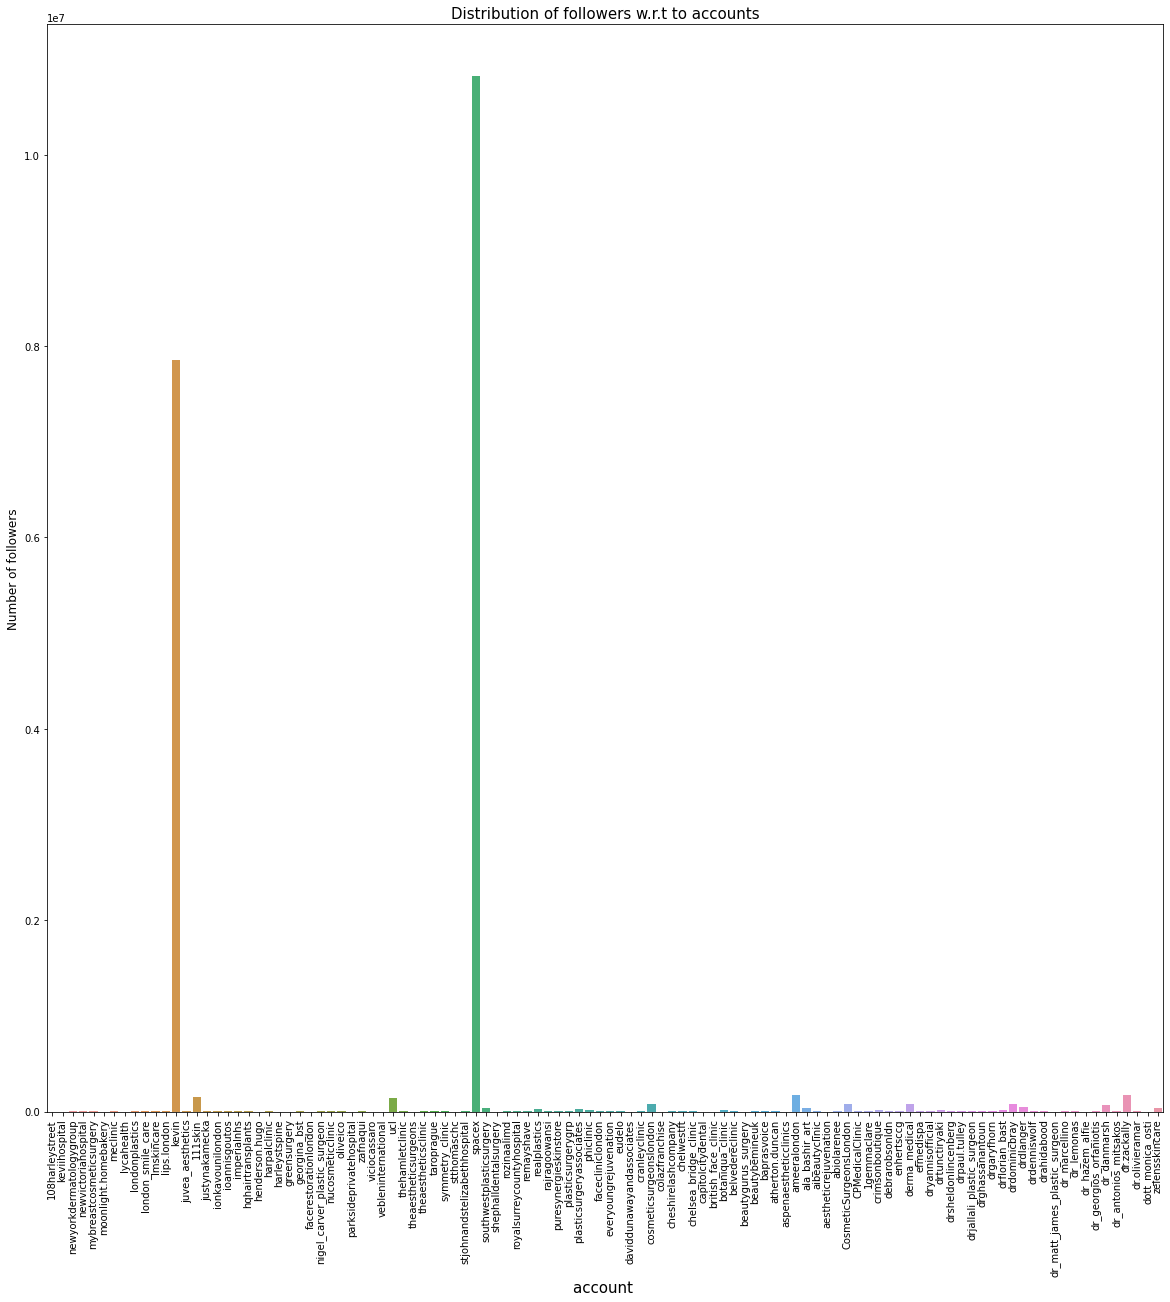

In [316]:
countfollowers=df.groupby("account")["followers"].aggregate(np.max).reset_index()
followers=countfollowers.followers.value_counts()
account=countfollowers.account.value_counts()
plt.figure(figsize=(20,20))
sns.barplot(account.index,followers.index,)
plt.ylabel('Number of followers',fontsize=12)
plt.xlabel('account ',fontsize=15)
plt.title('Distribution of followers w.r.t to accounts',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

We have to remove the outliers

it was observed only two accounts kevin and spacex have followers much greater than the other number of users .We also decided to remove the users which have the followers greater than 1 million and less than 100 followers

In [317]:
df.drop(df[df['followers'] < 100].index, inplace = True)
df.drop(df[df['followers'] > 20000].index, inplace = True)
# df.shape

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


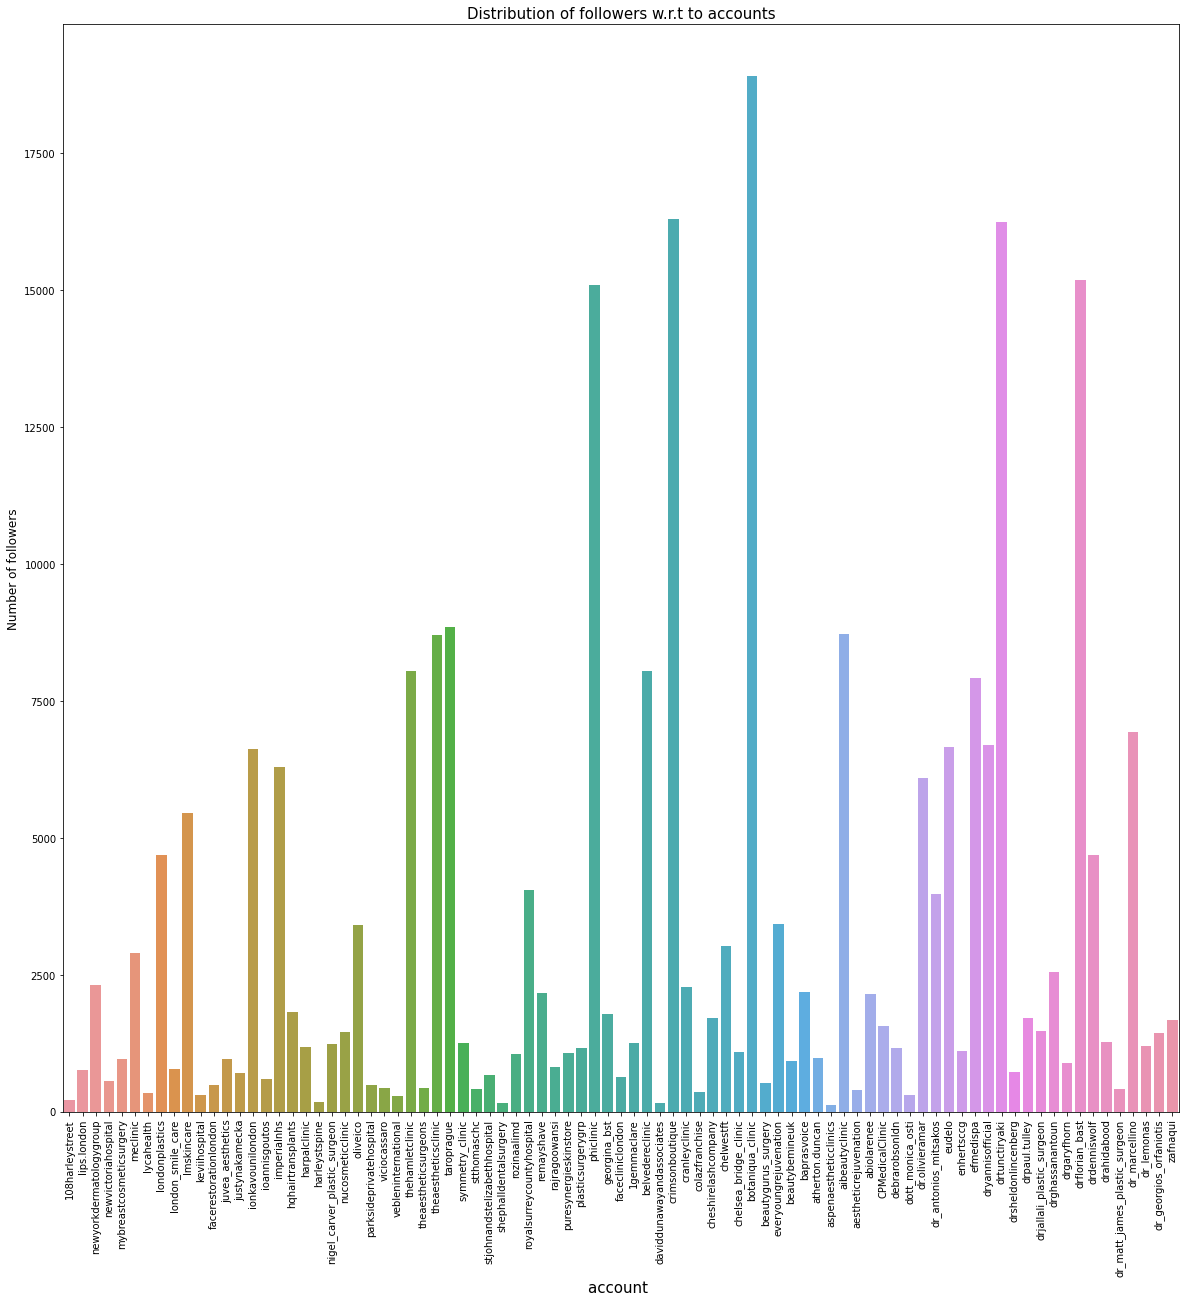

In [318]:
countfollowers=df.groupby("account")["followers"].aggregate(np.max).reset_index()
followers=countfollowers.followers.value_counts()
account=countfollowers.account.value_counts()
plt.figure(figsize=(20,20))
sns.barplot(account.index,followers.index,)
plt.ylabel('Number of followers',fontsize=12)
plt.xlabel('account ',fontsize=15)
plt.title('Distribution of followers w.r.t to accounts',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

###Distribution of users w.r.t to following

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


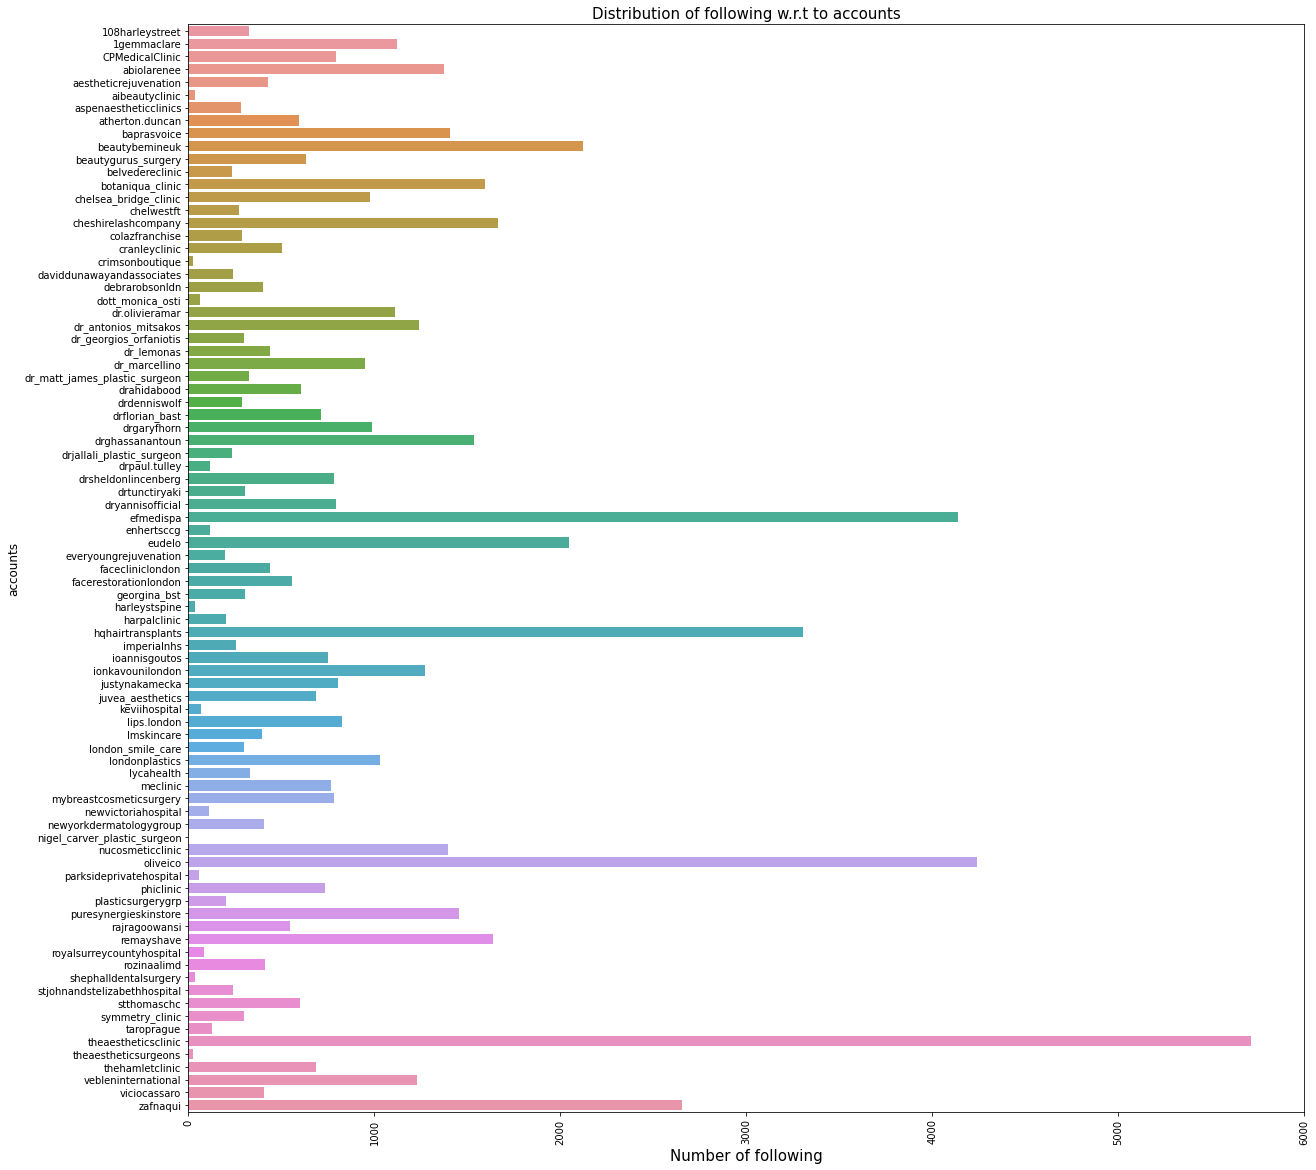

In [319]:
countfollowing=df.groupby("account")["following"].aggregate(np.max).reset_index()
plt.figure(figsize=(20,20))
# countfollowing.plot(x = "account", y = "following", kind = "bar",colormap='Paired')
sns.barplot(countfollowing.following,countfollowing.account)
plt.ylabel('accounts',fontsize=12)
plt.xlabel('Number of following',fontsize=15)
plt.title('Distribution of following w.r.t to accounts',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [320]:
# df.drop(df[df['following'] > 20000].index, inplace = True)
# # df.shape

###Distribution of users w.r.t to total posts

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


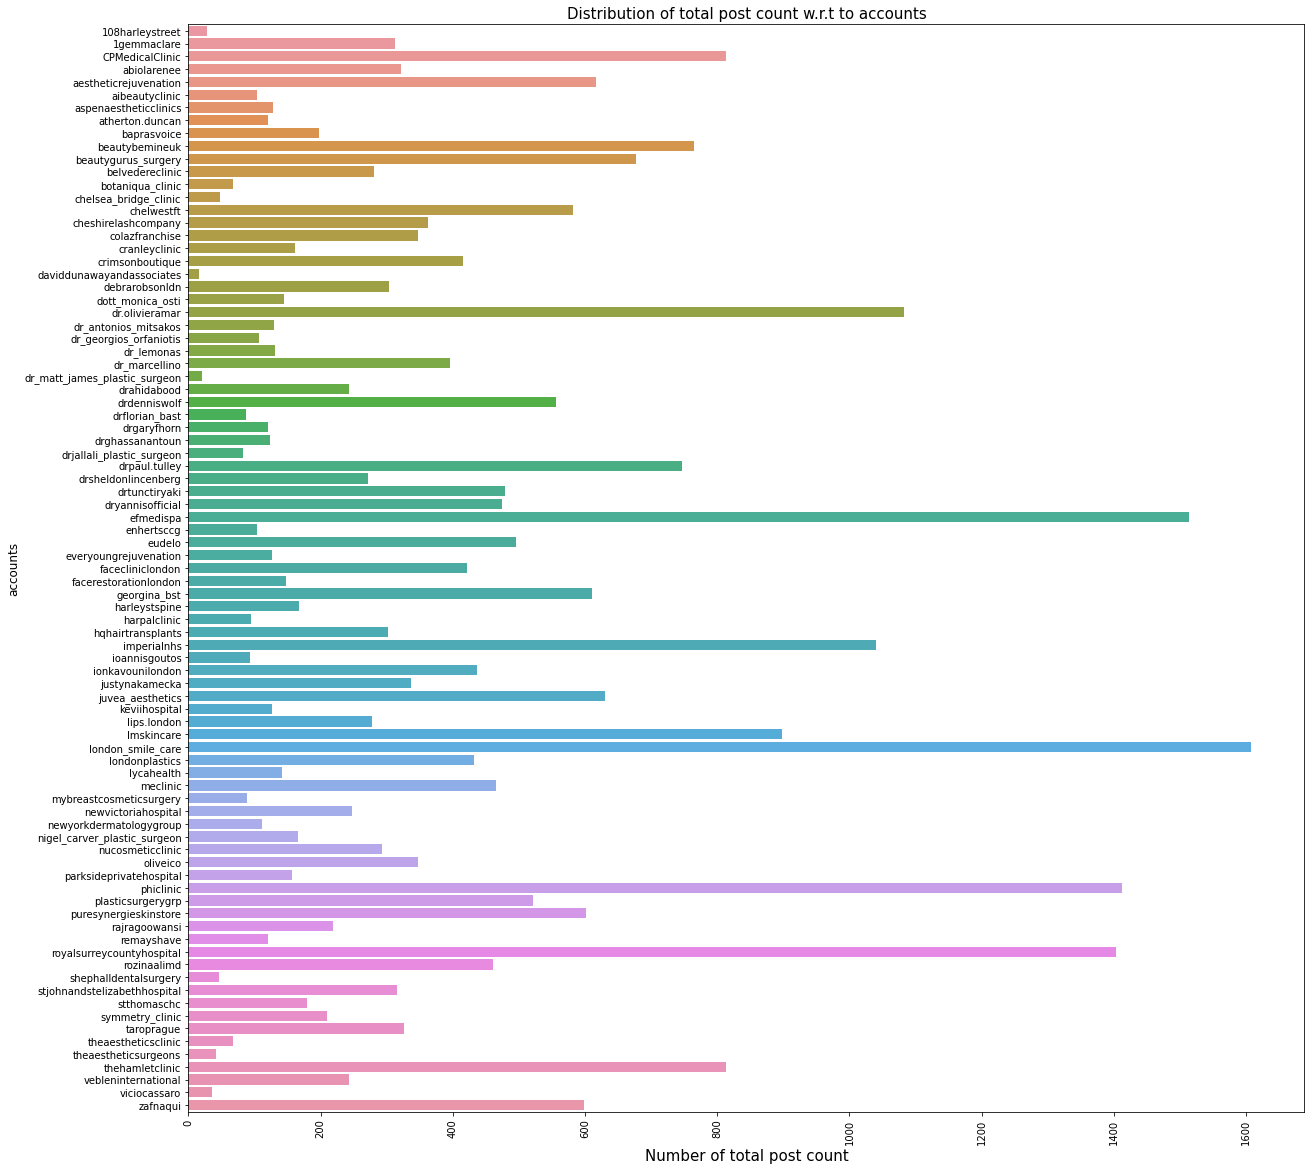

In [321]:
countPost_Count=df.groupby("account")["posts_count"].aggregate(np.max).reset_index()
plt.figure(figsize=(20,20))
sns.barplot(countPost_Count.posts_count,countPost_Count.account)
plt.ylabel('accounts',fontsize=12)
plt.xlabel('Number of total post count',fontsize=15)
plt.title('Distribution of total post count w.r.t to accounts',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

We can remove the users which have posts less than 10 

In [322]:
df.drop(df[df['posts_count'] < 10].index, inplace = True)

In [323]:
df.shape

(413, 25)

In [324]:
df['likes'].max()

1386

###Distribution of posts w.r.t to likes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


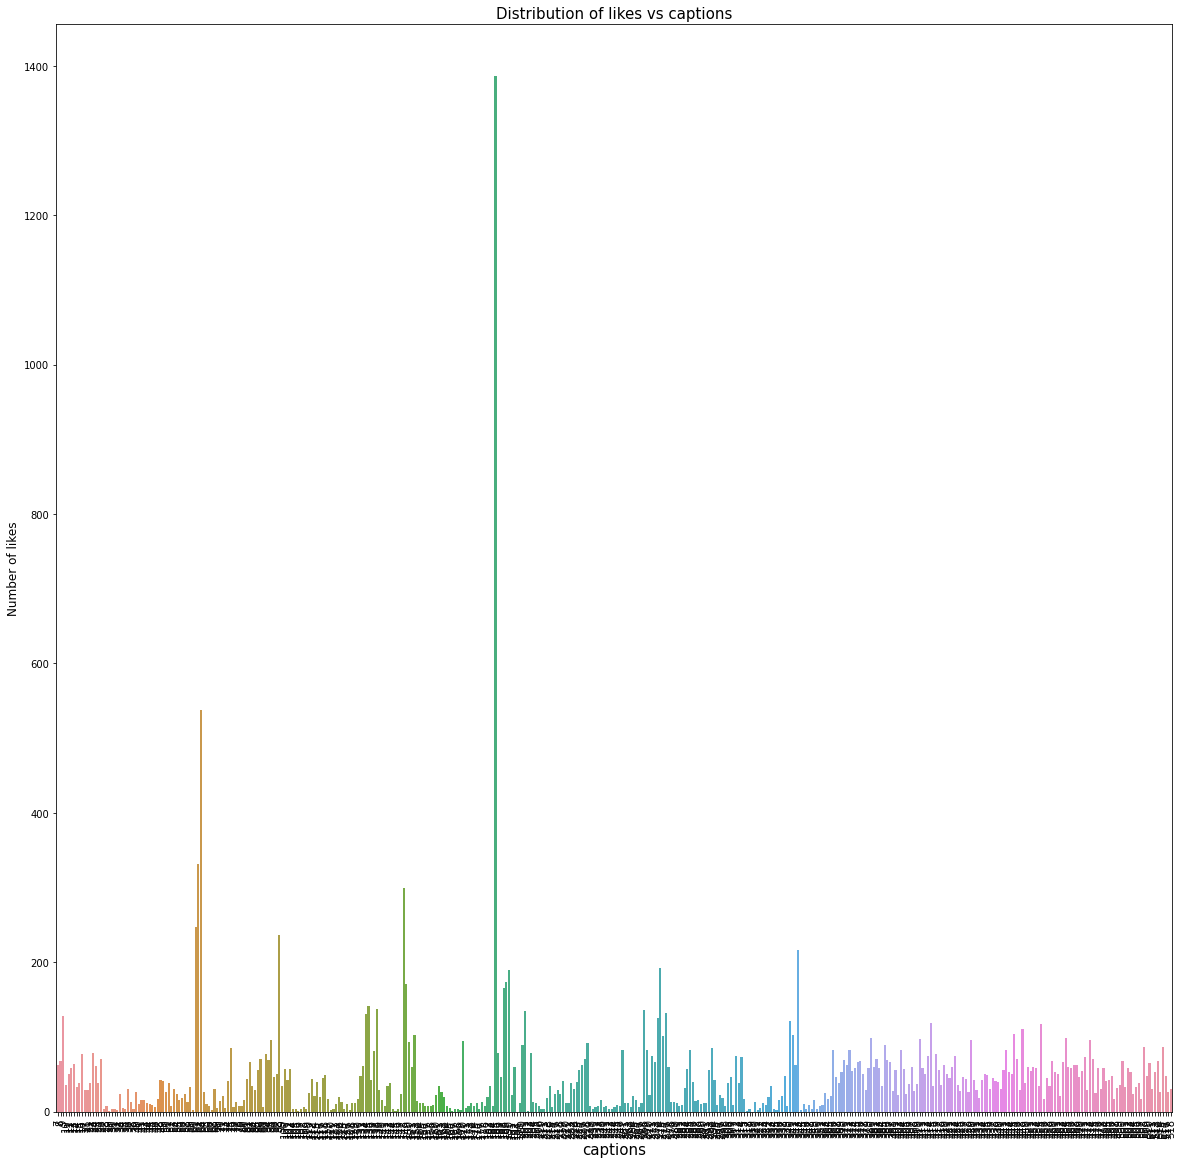

In [325]:
plt.figure(figsize=(20,20))
sns.barplot(df.caption.index,df.likes)
plt.ylabel('Number of likes',fontsize=12)
plt.xlabel('captions',fontsize=15)
plt.title('Distribution of likes vs captions',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

we can remove the posts with likes less than 5 

In [326]:
df.drop(df[df['likes'] < 5].index, inplace = True)

**What Day Of The Week User posts?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

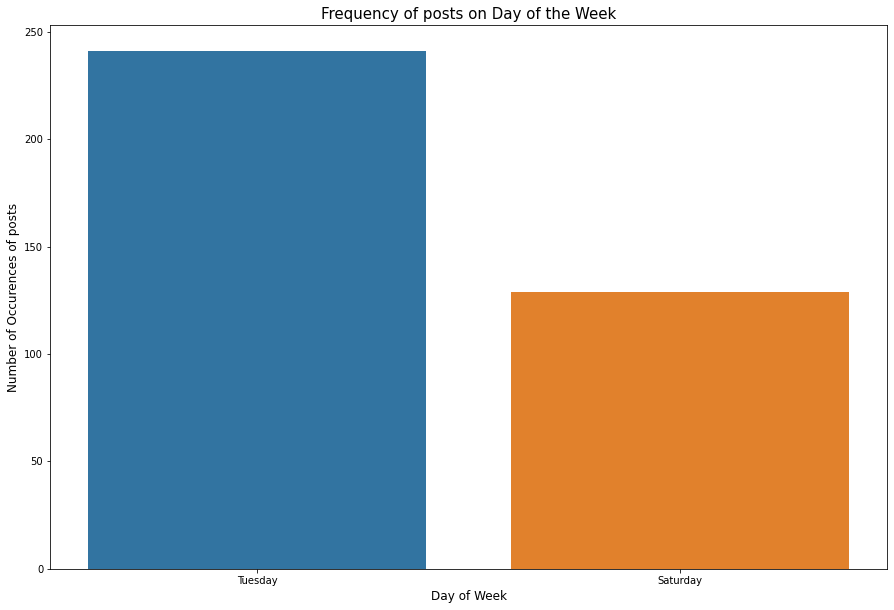

In [327]:
countDow=df['Dow'].value_counts()
plt.figure(figsize=(15,10))
sns.barplot(countDow.index,countDow.values)
plt.ylabel('Number of Occurences of posts',fontsize=12)
plt.xlabel('Day of Week',fontsize=12)
plt.title('Frequency of posts on Day of the Week',fontsize=15)
# plt.xticks(ticks=countDow.index,rotation='vertical')
plt.plot()

As from the above bar plot most of the time user is active on tuesday and Saturday.So it's likely high chance to post on that time of the day

**In which Hour user posts most ?**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


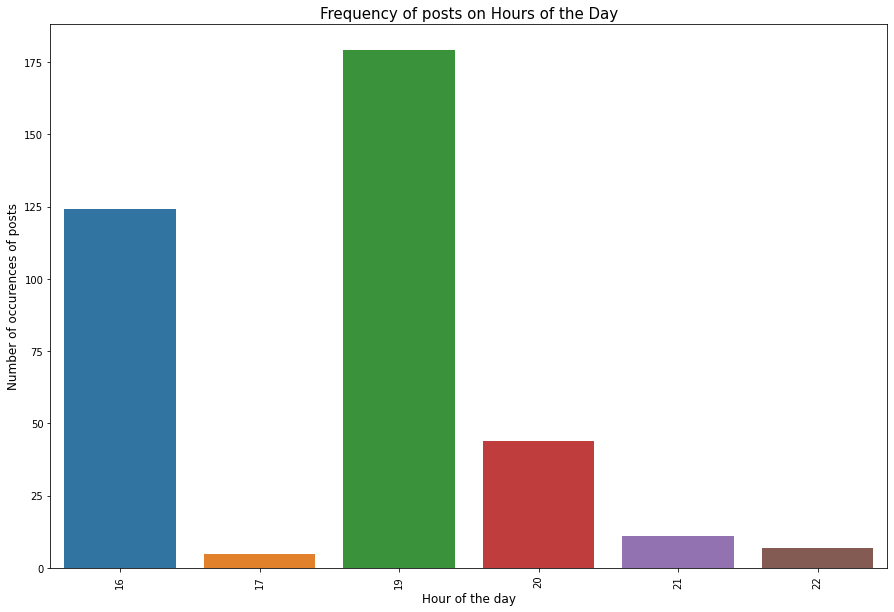

In [328]:
countHour=df['Hod'].value_counts()
plt.figure(figsize=(15,10))
sns.barplot(countHour.index,countHour.values)
plt.ylabel('Number of occurences of posts',fontsize=12)
plt.xlabel('Hour of the day',fontsize=12)
plt.title('Frequency of posts on Hours of the Day',fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

As from the above bar plot most of the time user is active on 4 ,7 and 8 pm.So this can be the right time to post on instagram 

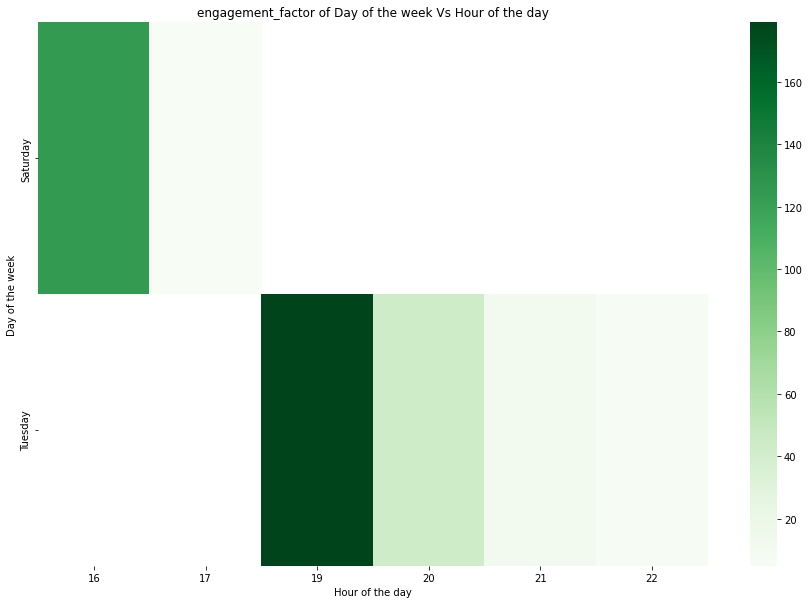

In [329]:
grp = df.groupby(['Dow','Hod'])['engagement_factor'].aggregate('count').reset_index()
grp = grp.pivot(index='Dow',columns='Hod',values='engagement_factor')
plt.figure(figsize=(15,10))
sns.heatmap(grp,cmap='Greens')
plt.title("engagement_factor of Day of the week Vs Hour of the day")
plt.xlabel('Hour of the day')
plt.ylabel('Day of the week')
plt.show()

This Heatmap tells everything, Lot of users mostly posts on Tuesday at 19' clock and Saturday at  16'clock.

##Exploration about numerical features

In [330]:
df.dtypes

account               object
caption               object
profile_name          object
biography             object
following              int64
likes                  int64
posts_count            int64
followers              int64
is_verified            int64
image_url             object
url                   object
comments               int64
video_view_count       int64
video_url             object
adultScore           float64
racyScore            float64
goreScore            float64
isBWImg                int64
clipArtType            int64
lineDrawingType        int64
tokens                object
Dow                   object
Hod                    int64
Date                  object
engagement_factor    float64
dtype: object

In [331]:
a=list(df.select_dtypes(['int']).columns)
b=list(df.select_dtypes(['float']).columns)

c=a+b

In [332]:
df1 = pd.DataFrame(df, columns=c)

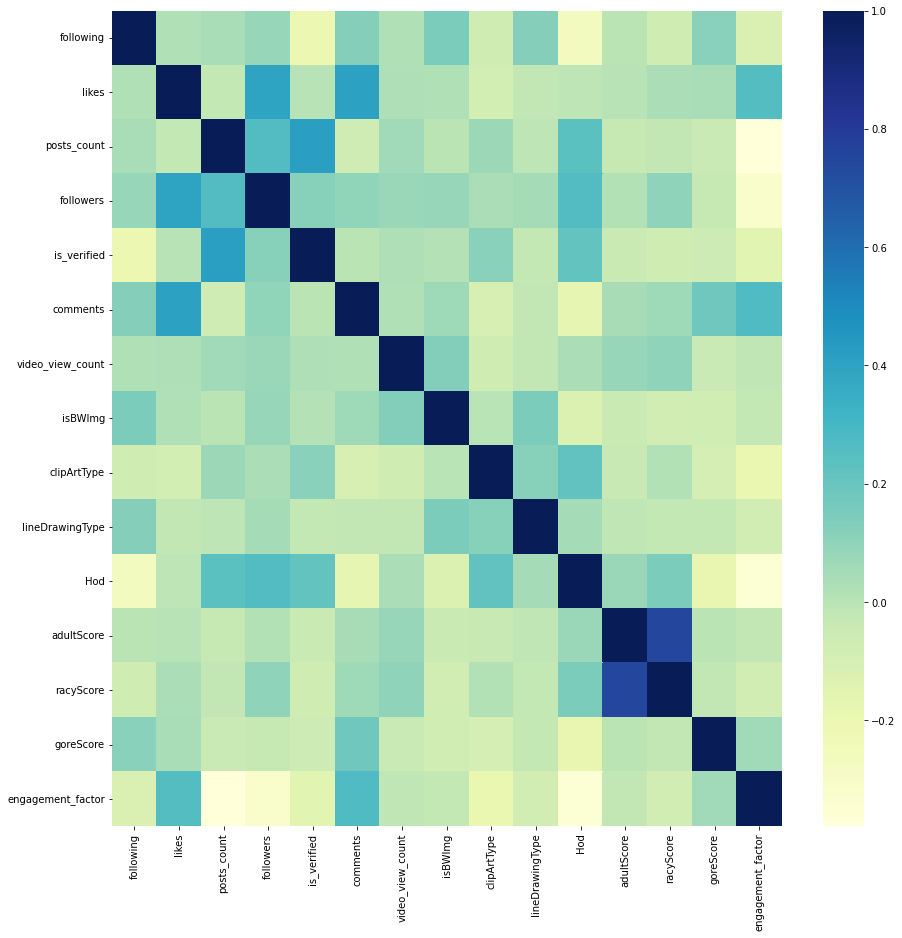

In [333]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sns.heatmap(df1.corr(),cmap="YlGnBu")
plt.show()

This shows there is a correlation between the below core
1. likes & comments 
2. post_count and followers 
3. likes & followers
4. adultScore & RacyScore

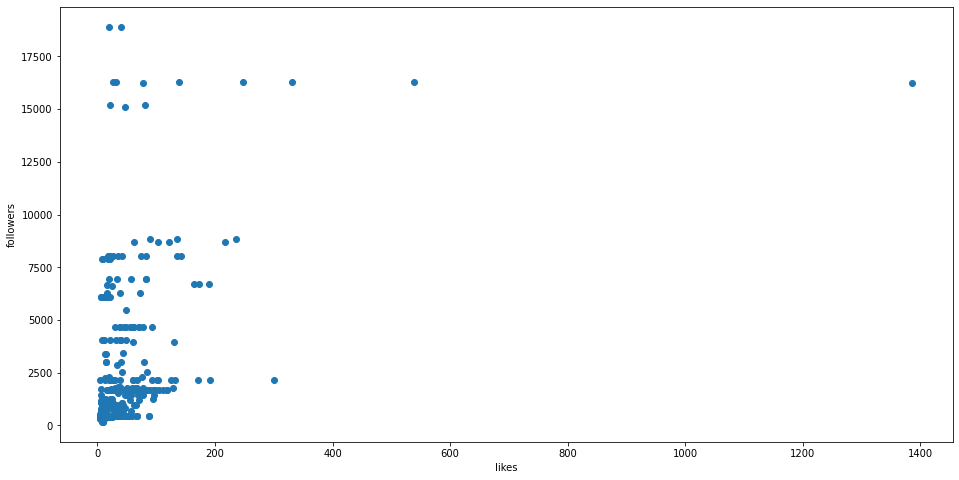

In [334]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['likes'], df['followers'])
ax.set_xlabel('likes')
ax.set_ylabel('followers')
plt.show()

With the increasing number of followers the number of likes increases

###Distribution of likes vs comments 

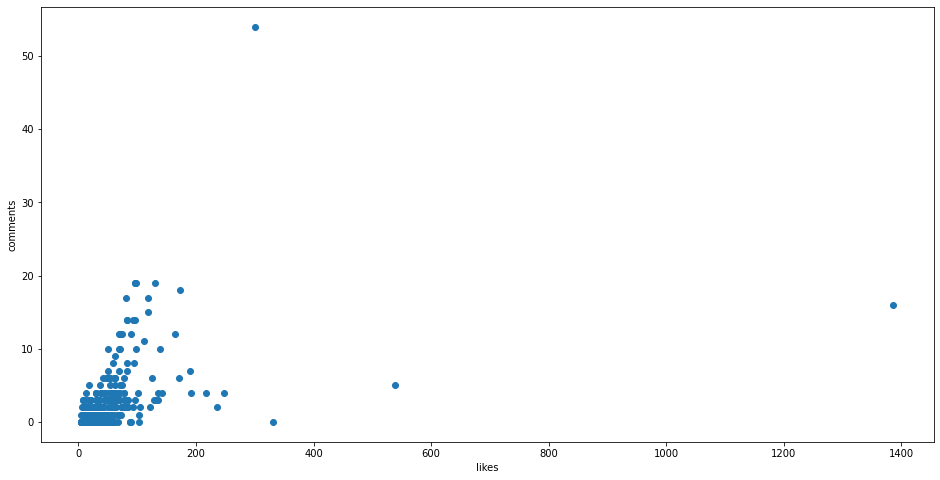

In [335]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['likes'], df['comments'])
ax.set_xlabel('likes')
ax.set_ylabel('comments')
plt.show()

###Distribution of racyScore Vs adultScore

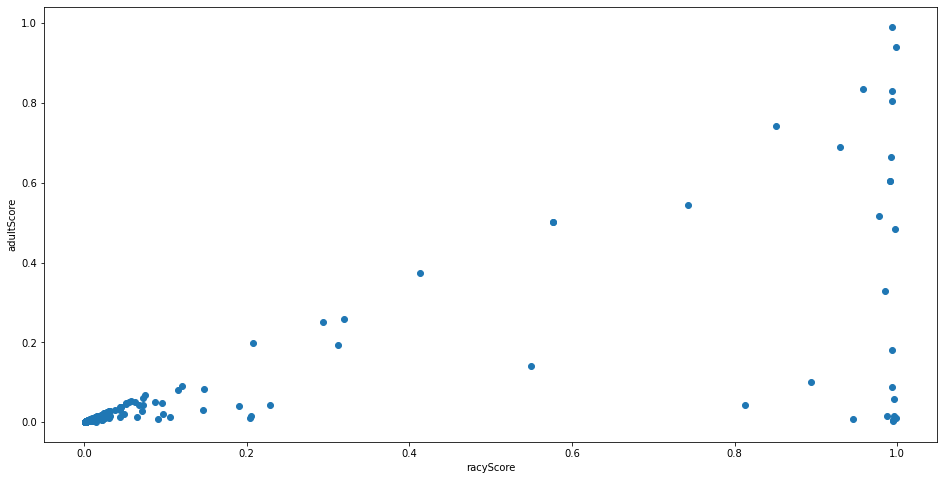

In [336]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['racyScore'], df['adultScore'])
ax.set_xlabel('racyScore')
ax.set_ylabel('adultScore')
plt.show()

In [337]:
df1=df

#Features Engineering

##Average Likes's Features

Average number of likes of k most recent posts of the account for different values of k

In [338]:
df['account'].value_counts().min()
df['account'].value_counts().max()

104

In [339]:
average=df.groupby(by=['account','likes'])['Date'].aggregate('max').to_frame('u_timestamp').reset_index()
average

,account,likes,u_timestamp
0,108harleystreet,8,2021-11-02
1,1gemmaclare,94,2021-11-02
2,CPMedicalClinic,35,2021-11-02
3,abiolarenee,60,2021-11-02
4,abiolarenee,67,2021-11-02
...,...,...,...
285,viciocassaro,68,2021-11-06
286,viciocassaro,87,2021-11-06
287,zafnaqui,42,2021-11-02
288,zafnaqui,56,2021-11-02


In [340]:
average['account'].value_counts()

cheshirelashcompany             52
viciocassaro                    16
rozinaalimd                     11
abiolarenee                     10
georgina_bst                    10
                                ..
lmskincare                       1
meclinic                         1
debrarobsonldn                   1
nigel_carver_plastic_surgeon     1
108harleystreet                  1
Name: account, Length: 80, dtype: int64

In [341]:
Average_likes=average.groupby(by=['account'])['likes'].aggregate('mean').to_frame('Average_Likes').reset_index()

In [342]:
Average_likes

,account,Average_Likes
0,108harleystreet,8.00
1,1gemmaclare,94.00
2,CPMedicalClinic,35.00
3,abiolarenee,134.40
4,aestheticrejuvenation,6.00
...,...,...
75,theaestheticsurgeons,25.50
76,thehamletclinic,83.00
77,vebleninternational,10.50
78,viciocassaro,43.75


#Recent Likes

The exact number of likes acheived by the most recent published posts

In [343]:
recent_likes=average.groupby(by=['account'])['likes'].aggregate('max').to_frame('u_recent_likes').reset_index()
recent_likes

,account,u_recent_likes
0,108harleystreet,8
1,1gemmaclare,94
2,CPMedicalClinic,35
3,abiolarenee,300
4,aestheticrejuvenation,7
...,...,...
75,theaestheticsurgeons,35
76,thehamletclinic,142
77,vebleninternational,11
78,viciocassaro,87


#Time feature

###When the user posts on instagram probablity of day of the week user can gets most of the likes

In [344]:
#day of the week user likes the most
dow=df.groupby(by=['account','likes'])['Dow'].aggregate(lambda x:stats.mode(x)[0]).to_frame('Dow_u_likes_the_most').reset_index()
dow.iloc[:]
# dow.loc[dow['account'].isin(['lips.london'])]

,account,likes,Dow_u_likes_the_most
0,108harleystreet,8,Tuesday
1,1gemmaclare,94,Tuesday
2,CPMedicalClinic,35,Tuesday
3,abiolarenee,60,Tuesday
4,abiolarenee,67,Tuesday
...,...,...,...
285,viciocassaro,68,Saturday
286,viciocassaro,87,Saturday
287,zafnaqui,42,Tuesday
288,zafnaqui,56,Tuesday


choose the maximum likes

In [345]:
dow_=dow.groupby(by=['account','Dow_u_likes_the_most'])['likes'].aggregate('max').to_frame('dow_user_gets_maximum_likes').reset_index()
dow_
# dow_.loc[dow_['account'].isin(['lips.london'])]

,account,Dow_u_likes_the_most,dow_user_gets_maximum_likes
0,108harleystreet,Tuesday,8
1,1gemmaclare,Tuesday,94
2,CPMedicalClinic,Tuesday,35
3,abiolarenee,Tuesday,300
4,aestheticrejuvenation,Tuesday,7
...,...,...,...
75,theaestheticsurgeons,Tuesday,35
76,thehamletclinic,Tuesday,142
77,vebleninternational,Tuesday,11
78,viciocassaro,Saturday,87


###Hour of the week user gets likes the most

When the user posts on instagram probablity of hour of the day user can gets most of the likes

In [346]:
#HOUR of the week user likes the most
hod=df.groupby(by=['account','likes'])['Hod'].aggregate(lambda x:stats.mode(x)[0]).to_frame('Hod_u_max_likes_hour').reset_index()
hod.iloc[:]
# len(hod.account.unique())

,account,likes,Hod_u_max_likes_hour
0,108harleystreet,8,19
1,1gemmaclare,94,19
2,CPMedicalClinic,35,19
3,abiolarenee,60,20
4,abiolarenee,67,20
...,...,...,...
285,viciocassaro,68,16
286,viciocassaro,87,16
287,zafnaqui,42,20
288,zafnaqui,56,20


In [347]:
hod_=hod.groupby(by=['account'])['likes'].aggregate('max').to_frame('HoD_u_most_like_values').reset_index()
hod_
# dow_.loc[dow_['account'].isin(['lips.london'])]

,account,HoD_u_most_like_values
0,108harleystreet,8
1,1gemmaclare,94
2,CPMedicalClinic,35
3,abiolarenee,300
4,aestheticrejuvenation,7
...,...,...
75,theaestheticsurgeons,35
76,thehamletclinic,142
77,vebleninternational,11
78,viciocassaro,87


In [348]:
# hod_['Hod_u_max_likes_hour_']=hod.set_index('account').lookup(hod_.account,hod_.HoD_u_most_like_values)

In [349]:
HoD_=hod.groupby(by=['account'])['likes'].aggregate('max').to_frame('HoD_u_most_like_values')
HoD_

,HoD_u_most_like_values
account,
108harleystreet,8
1gemmaclare,94
CPMedicalClinic,35
abiolarenee,300
aestheticrejuvenation,7
...,...
theaestheticsurgeons,35
thehamletclinic,142
vebleninternational,11


In [350]:
# merged_data= HoD_.merge(hod, on=["account","HoD_u_most_like_values"])

In [351]:
# HoD_ = pd.merge(hod,HoD_,  how='left', left_on=['HoD_u_most_like_values', 'account'], right_on = ['Hod_u_max_likes_hour', 'account'])
# HoD_

# # users=pd.merge(HoD_,hod,on=['account'],how='left')

###Combining all the time features

In [352]:
HoD_=HoD_.merge(dow_,on='account',how='left')
HoD_

,account,HoD_u_most_like_values,Dow_u_likes_the_most,dow_user_gets_maximum_likes
0,108harleystreet,8,Tuesday,8
1,1gemmaclare,94,Tuesday,94
2,CPMedicalClinic,35,Tuesday,35
3,abiolarenee,300,Tuesday,300
4,aestheticrejuvenation,7,Tuesday,7
...,...,...,...,...
75,theaestheticsurgeons,35,Tuesday,35
76,thehamletclinic,142,Tuesday,142
77,vebleninternational,11,Tuesday,11
78,viciocassaro,87,Saturday,87


#Engagement factor

In [353]:
# engagement_factor=df.groupby(by=['caption'])['engagement_factor'].aggregate('mean').to_frame('engagement_factor').reset_index()
# engagement_factor.iloc[:]

###combining all the three features into one 

In [354]:
Average_likes=Average_likes.merge(recent_likes,on='account',how='left')
Average_likes=Average_likes.merge(HoD_,on='account',how='left')
# Average_likes=Average_likes.merge(engagement_factor,on='account',how='left')
Average_likes

,account,Average_Likes,u_recent_likes,HoD_u_most_like_values,Dow_u_likes_the_most,dow_user_gets_maximum_likes
0,108harleystreet,8.00,8,8,Tuesday,8
1,1gemmaclare,94.00,94,94,Tuesday,94
2,CPMedicalClinic,35.00,35,35,Tuesday,35
3,abiolarenee,134.40,300,300,Tuesday,300
4,aestheticrejuvenation,6.00,7,7,Tuesday,7
...,...,...,...,...,...,...
75,theaestheticsurgeons,25.50,35,35,Tuesday,35
76,thehamletclinic,83.00,142,142,Tuesday,142
77,vebleninternational,10.50,11,11,Tuesday,11
78,viciocassaro,43.75,87,87,Saturday,87


# NLP Text-related features

There are many different features within the dataset that utilize text including biography, hashtags, location, and caption. For the purposes of our project we chose to focus on the caption because we were analyzing independent posts and wanted to use as much information about the post, not the poster, as possible.

In [355]:
!pip install -U textblob
# from textblob import TextBlob

TextBlob returns polarity and subjectivity of a sentence. Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. N

In [356]:
df1 = df1.astype(str)

In [357]:
from textblob import TextBlob


def sentiment_analysis(caption):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(caption):
   return TextBlob(caption).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 df1['TextBlob_Subjectivity'] =    df1['caption'].apply(getSubjectivity)
 df1 ['TextBlob_Polarity'] = df1['caption'].apply(getPolarity)


 def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


 df1 ['TextBlob_Analysis'] = df1['TextBlob_Polarity'].apply(getAnalysis )
 return df1

In [358]:
# tex = "man violent happy"
# print(sentiment_analysis(tex))

In [359]:
df1.dtypes

account              object
caption              object
profile_name         object
biography            object
following            object
likes                object
posts_count          object
followers            object
is_verified          object
image_url            object
url                  object
comments             object
video_view_count     object
video_url            object
adultScore           object
racyScore            object
goreScore            object
isBWImg              object
clipArtType          object
lineDrawingType      object
tokens               object
Dow                  object
Hod                  object
Date                 object
engagement_factor    object
dtype: object

In [360]:
df1.head()

,account,caption,profile_name,biography,following,likes,posts_count,followers,is_verified,image_url,url,comments,video_view_count,video_url,adultScore,racyScore,goreScore,isBWImg,clipArtType,lineDrawingType,tokens,Dow,Hod,Date,engagement_factor
7,atherton.duncan,3 months post op open rhinoplasty involving a ...,duncan atherton rhinoplasty,"j_globe4 london, uk\nn_building6 co-founder ...",595,63,121,986,0,j_kvihwg0g1c283e3byk.95bb74294d3d322bb266581de...,https://www.instagram.com/p/CQ74H_zLIha/,5,0,nan,0.041418564,0.191116735,0.007061391,0,0,0,"['white', 'black', 'text', 'screenshot', 'grap...",Tuesday,19,2021-11-02,0.06
8,georgina_bst,"beautiful tulips in bowling green, nyc's oldes...",georgina borneman-street,"j_globe4 london, uk\nn_building6 co-founder ...",304,68,611,1785,0,j_kvihwg0g1c283e3byk.d3b260f90252d61b964194b59...,https://www.instagram.com/p/CSsQs3bFYWI/,0,0,nan,0.001021657,0.001981798,0.000915632,0,0,0,"['grey', 'red', 'building', 'outdoor', 'sky', ...",Tuesday,19,2021-11-02,0.04
9,georgina_bst,times square! â� â� \n.â� â� \n.â� â� \n.â� â�...,georgina borneman-street,"j_globe4 london, uk\nn_building6 co-founder ...",304,128,611,1785,0,j_kvihwg0g1c283e3byk.d3b260f90252d61b964194b59...,https://www.instagram.com/p/CSfabiFp4iI/,3,0,nan,0.001099343,0.001939648,0.000850264,0,0,0,"['grey', 'black', 'outdoor', 'sky', 'building'...",Tuesday,19,2021-11-02,0.07
10,georgina_bst,home for the last few months #homesweethome \n...,georgina borneman-street,"j_globe4 london, uk\nn_building6 co-founder ...",304,36,611,1785,0,j_kvihwg0g1c283e3byk.d3b260f90252d61b964194b59...,https://www.instagram.com/p/CVtYT8jvnAn/,1,0,nan,0.001089915,0.001977403,0.000755982,0,0,0,"['black', 'white', 'grey', 'outdoor', 'cloud',...",Tuesday,19,2021-11-02,0.02
11,georgina_bst,taking a day off to explore #sanjuancapistrano...,georgina borneman-street,"j_globe4 london, uk\nn_building6 co-founder ...",304,51,611,1785,0,j_kvihwg0g1c283e3byk.d3b260f90252d61b964194b59...,https://www.instagram.com/p/CUsSIA8lgAE/,1,0,nan,0.001092771,0.00185857,0.000695697,0,0,0,"['blue', 'grey', 'black', 'outdoor', 'sky', 't...",Tuesday,19,2021-11-02,0.03


In [292]:
# df1=df1["caption"].apply(lambda text: sentiment_analysis(text))

In [293]:
df1

7                   account  ... TextBlob_Analysis
7 ...
8                   account  ... TextBlob_Analysis
7 ...
9                   account  ... TextBlob_Analysis
7 ...
10                  account  ... TextBlob_Analysis
7 ...
11                  account  ... TextBlob_Analysis
7 ...
                             ...                        
514                 account  ... TextBlob_Analysis
7 ...
515                 account  ... TextBlob_Analysis
7 ...
516                 account  ... TextBlob_Analysis
7 ...
517                 account  ... TextBlob_Analysis
7 ...
518                 account  ... TextBlob_Analysis
7 ...
Name: caption, Length: 370, dtype: object

In [361]:
sentiment_analysis(df1['caption'])

,account,caption,profile_name,biography,following,likes,posts_count,followers,is_verified,image_url,url,comments,video_view_count,video_url,adultScore,racyScore,goreScore,isBWImg,clipArtType,lineDrawingType,tokens,Dow,Hod,Date,engagement_factor,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
7,atherton.duncan,3 months post op open rhinoplasty involving a ...,duncan atherton rhinoplasty,"j_globe4 london, uk\nn_building6 co-founder ...",595,63,121,986,0,j_kvihwg0g1c283e3byk.95bb74294d3d322bb266581de...,https://www.instagram.com/p/CQ74H_zLIha/,5,0,nan,0.041418564,0.191116735,0.007061391,0,0,0,"['white', 'black', 'text', 'screenshot', 'grap...",Tuesday,19,2021-11-02,0.06,0.500000,0.000000,Neutral
8,georgina_bst,"beautiful tulips in bowling green, nyc's oldes...",georgina borneman-street,"j_globe4 london, uk\nn_building6 co-founder ...",304,68,611,1785,0,j_kvihwg0g1c283e3byk.d3b260f90252d61b964194b59...,https://www.instagram.com/p/CSsQs3bFYWI/,0,0,nan,0.001021657,0.001981798,0.000915632,0,0,0,"['grey', 'red', 'building', 'outdoor', 'sky', ...",Tuesday,19,2021-11-02,0.04,0.455556,0.216667,Positive
9,georgina_bst,times square! â� â� \n.â� â� \n.â� â� \n.â� â�...,georgina borneman-street,"j_globe4 london, uk\nn_building6 co-founder ...",304,128,611,1785,0,j_kvihwg0g1c283e3byk.d3b260f90252d61b964194b59...,https://www.instagram.com/p/CSfabiFp4iI/,3,0,nan,0.001099343,0.001939648,0.000850264,0,0,0,"['grey', 'black', 'outdoor', 'sky', 'building'...",Tuesday,19,2021-11-02,0.07,0.000000,0.000000,Neutral
10,georgina_bst,home for the last few months #homesweethome \n...,georgina borneman-street,"j_globe4 london, uk\nn_building6 co-founder ...",304,36,611,1785,0,j_kvihwg0g1c283e3byk.d3b260f90252d61b964194b59...,https://www.instagram.com/p/CVtYT8jvnAn/,1,0,nan,0.001089915,0.001977403,0.000755982,0,0,0,"['black', 'white', 'grey', 'outdoor', 'cloud',...",Tuesday,19,2021-11-02,0.02,0.083333,-0.100000,Negative
11,georgina_bst,taking a day off to explore #sanjuancapistrano...,georgina borneman-street,"j_globe4 london, uk\nn_building6 co-founder ...",304,51,611,1785,0,j_kvihwg0g1c283e3byk.d3b260f90252d61b964194b59...,https://www.instagram.com/p/CUsSIA8lgAE/,1,0,nan,0.001092771,0.00185857,0.000695697,0,0,0,"['blue', 'grey', 'black', 'outdoor', 'sky', 't...",Tuesday,19,2021-11-02,0.03,0.250000,0.068182,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,viciocassaro,wow.,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",407,27,36,431,0,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/wXE3J1pmXB/,1,0,nan,0.00122938,0.002201432,0.000616039,0,0,0,"['grey', 'black', 'outdoor', 'aerial', 'photog...",Saturday,17,2021-11-06,0.06,1.000000,0.100000,Positive
515,viciocassaro,ðÿ‘”,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",407,87,36,431,0,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/CJ03kIkj8cH/,0,0,nan,0.008393796,0.01121995,0.000873744,0,0,0,"['black', 'person', 'christmas', 'tree', 'clot...",Saturday,17,2021-11-06,0.2,0.000000,0.000000,Neutral
516,viciocassaro,#onestepcloser,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",407,48,36,431,0,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/5JvdTIJmWU/,0,0,nan,0.000879497,0.001614613,0.000562696,0,0,0,"['white', 'human', 'face', 'person', 'clothing...",Saturday,17,2021-11-06,0.11,0.000000,0.000000,Neutral
517,viciocassaro,wow.,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",407,27,36,437,0,j_kvo3dl7njv41lgn55.c75281bab6c50a2a8905d2be3a...,https://www.instagram.com/p/wXE3J1pmXB/,1,0,nan,0.001229377,0.002201427,0.000616038,0,0,0,"['grey', 'black', 'outdoor', 'aerial', 'photog...",Saturday,17,2021-11-06,0.06,1.000000,0.100000,Positive


In [362]:
df1=df1.merge(Average_likes,on='account',how='left')
df1

,account,caption,profile_name,biography,following,likes,posts_count,followers,is_verified,image_url,url,comments,video_view_count,video_url,adultScore,racyScore,goreScore,isBWImg,clipArtType,lineDrawingType,tokens,Dow,Hod,Date,engagement_factor,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,Average_Likes,u_recent_likes,HoD_u_most_like_values,Dow_u_likes_the_most,dow_user_gets_maximum_likes
0,atherton.duncan,3 months post op open rhinoplasty involving a ...,duncan atherton rhinoplasty,"j_globe4 london, uk\nn_building6 co-founder ...",595,63,121,986,0,j_kvihwg0g1c283e3byk.95bb74294d3d322bb266581de...,https://www.instagram.com/p/CQ74H_zLIha/,5,0,nan,0.041418564,0.191116735,0.007061391,0,0,0,"['white', 'black', 'text', 'screenshot', 'grap...",Tuesday,19,2021-11-02,0.06,0.500000,0.000000,Neutral,41.833333,66,66,Tuesday,66
1,georgina_bst,"beautiful tulips in bowling green, nyc's oldes...",georgina borneman-street,"j_globe4 london, uk\nn_building6 co-founder ...",304,68,611,1785,0,j_kvihwg0g1c283e3byk.d3b260f90252d61b964194b59...,https://www.instagram.com/p/CSsQs3bFYWI/,0,0,nan,0.001021657,0.001981798,0.000915632,0,0,0,"['grey', 'red', 'building', 'outdoor', 'sky', ...",Tuesday,19,2021-11-02,0.04,0.455556,0.216667,Positive,58.200000,128,128,Tuesday,128
2,georgina_bst,times square! â� â� \n.â� â� \n.â� â� \n.â� â�...,georgina borneman-street,"j_globe4 london, uk\nn_building6 co-founder ...",304,128,611,1785,0,j_kvihwg0g1c283e3byk.d3b260f90252d61b964194b59...,https://www.instagram.com/p/CSfabiFp4iI/,3,0,nan,0.001099343,0.001939648,0.000850264,0,0,0,"['grey', 'black', 'outdoor', 'sky', 'building'...",Tuesday,19,2021-11-02,0.07,0.000000,0.000000,Neutral,58.200000,128,128,Tuesday,128
3,georgina_bst,home for the last few months #homesweethome \n...,georgina borneman-street,"j_globe4 london, uk\nn_building6 co-founder ...",304,36,611,1785,0,j_kvihwg0g1c283e3byk.d3b260f90252d61b964194b59...,https://www.instagram.com/p/CVtYT8jvnAn/,1,0,nan,0.001089915,0.001977403,0.000755982,0,0,0,"['black', 'white', 'grey', 'outdoor', 'cloud',...",Tuesday,19,2021-11-02,0.02,0.083333,-0.100000,Negative,58.200000,128,128,Tuesday,128
4,georgina_bst,taking a day off to explore #sanjuancapistrano...,georgina borneman-street,"j_globe4 london, uk\nn_building6 co-founder ...",304,51,611,1785,0,j_kvihwg0g1c283e3byk.d3b260f90252d61b964194b59...,https://www.instagram.com/p/CUsSIA8lgAE/,1,0,nan,0.001092771,0.00185857,0.000695697,0,0,0,"['blue', 'grey', 'black', 'outdoor', 'sky', 't...",Tuesday,19,2021-11-02,0.03,0.250000,0.068182,Positive,58.200000,128,128,Tuesday,128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365,viciocassaro,wow.,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",407,27,36,431,0,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/wXE3J1pmXB/,1,0,nan,0.00122938,0.002201432,0.000616039,0,0,0,"['grey', 'black', 'outdoor', 'aerial', 'photog...",Saturday,17,2021-11-06,0.06,1.000000,0.100000,Positive,43.750000,87,87,Saturday,87
366,viciocassaro,ðÿ‘”,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",407,87,36,431,0,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/CJ03kIkj8cH/,0,0,nan,0.008393796,0.01121995,0.000873744,0,0,0,"['black', 'person', 'christmas', 'tree', 'clot...",Saturday,17,2021-11-06,0.2,0.000000,0.000000,Neutral,43.750000,87,87,Saturday,87
367,viciocassaro,#onestepcloser,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",407,48,36,431,0,j_kvo3danq1yzea4j0jg.70f863db800ffee4380f1c4cd...,https://www.instagram.com/p/5JvdTIJmWU/,0,0,nan,0.000879497,0.001614613,0.000562696,0,0,0,"['white', 'human', 'face', 'person', 'clothing...",Saturday,17,2021-11-06,0.11,0.000000,0.000000,Neutral,43.750000,87,87,Saturday,87
368,viciocassaro,wow.,vincenzo cassaro,"j_globe4 london, uk\nn_building6 co-founder ...",407,27,36,437,0,j_kvo3dl7njv41lgn55.c75281bab6c

In [363]:
# df = remove_html(df['caption'][0])
df1["hashtags"] = df1["caption"].apply(lambda text: hashtag_extract(text))

Text(0, 0.5, 'Count')

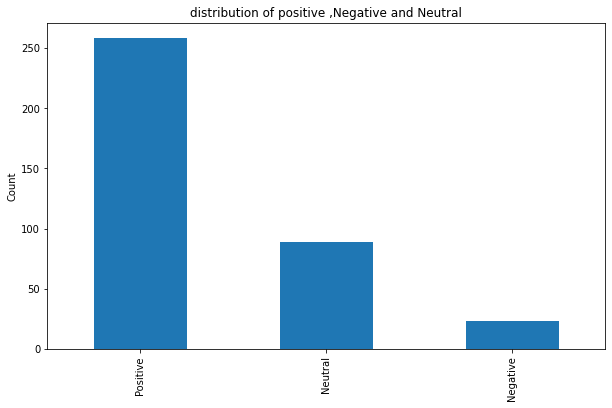

In [364]:
ax=df1['TextBlob_Analysis'].value_counts().plot(kind='bar',figsize=(10,6),title="distribution of positive ,Negative and Neutral")
ax.set_ylabel("Count")

In [365]:
df=df1

Average word length in each caption in Positive vs Negative

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each caption')

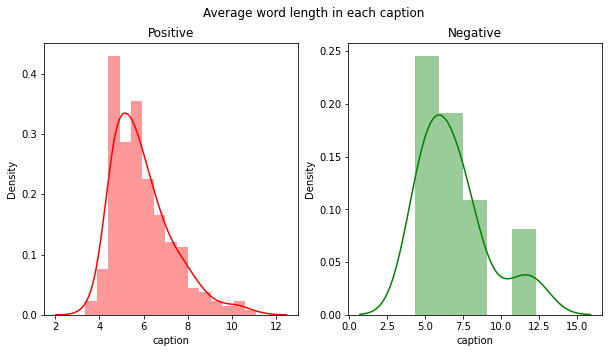

In [366]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df[df['TextBlob_Analysis']=='Positive']['caption'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Positive')
word=df[df['TextBlob_Analysis']=='Negative']['caption'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Negative')
fig.suptitle('Average word length in each caption')

Average word length in each caption in Neutral vs Positive

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each caption')

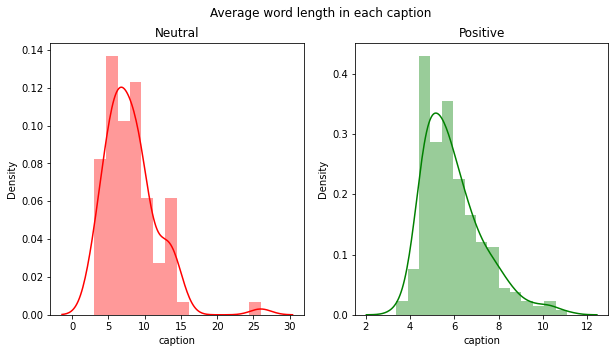

In [367]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df[df['TextBlob_Analysis']=='Neutral']['caption'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Neutral')
word=df[df['TextBlob_Analysis']=='Positive']['caption'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Positive')
fig.suptitle('Average word length in each caption')

Average word length in each caption in Neutral vs Negative

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Average word length in each caption')

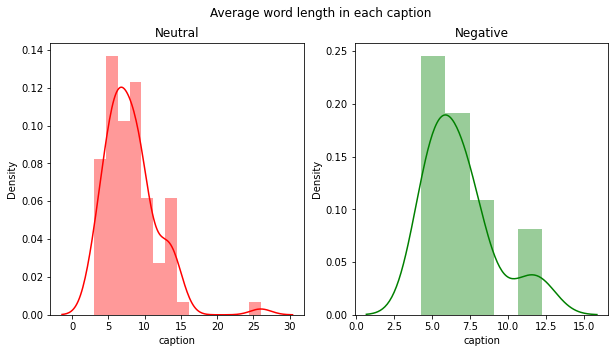

In [368]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))
word=df[df['TextBlob_Analysis']=='Neutral']['caption'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Neutral')
word=df[df['TextBlob_Analysis']=='Negative']['caption'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Negative')
fig.suptitle('Average word length in each caption')

#Visualizing Hashtags

A Python package for online marketing productivity and analysis. You can learn more about it in the GitHub repo, and it can easily be installed by running:

In [370]:
!pip install advertools
import advertools as adv

Let's start by extracting the hashtags.



In [371]:
hashtag_summary = adv.extract_hashtags(df['caption'])
hashtag_summary.keys()

dict_keys(['hashtags', 'hashtags_flat', 'hashtag_counts', 'hashtag_freq', 'top_hashtags', 'overview'])

The most general one to get a quick idea about the data is the overview key.
This shows us how many posts we have, the total number of hashtags (or mentions, or emoji), the average number of hashtags per post, and the number of unique hashtags.

In [372]:
hashtag_summary['overview']

{'hashtags_per_post': 6.027027027027027,
 'num_hashtags': 2230,
 'num_posts': 370,
 'unique_hashtags': 1204}

Next, we can explore the extracted hashtags themselves. Here we are looking at the first ten.
As you can see for each post we get a list of hashtags. We get an empty list wherever there are no hashtags in the tweet.

In [373]:
hashtag_summary['hashtags'][:10]

[['#rhinoplasty',
  '#septorhinoplasty',
  '#tipplasty',
  '#nosejob',
  '#humpreduction',
  '#smallernose',
  '#londonrhinoplasty',
  '#harleystreetrhinoplasty',
  '#londonrhinoplasty',
  '#thelondonrhinoplastyclinic',
  '#rhinoplastyexpert',
  '#rhinoplastypreandpost',
  '#rhinoplastybeforeandafterphotos'],
 ['#â',
  '#nyc',
  '#tulips',
  '#yellowcab',
  '#instanewyork',
  '#nylife',
  '#newyorkstreets',
  '#newyorkcityphotography',
  '#imagesofnyc',
  '#icnewyorkcity',
  '#newyorktrip',
  '#topnewyorkphoto',
  '#empirestateofmindâ',
  '#nofilterneeded'],
 ['#timessquare',
  '#yellowcab',
  '#instanewyork',
  '#nylife',
  '#newyorkstreets',
  '#newyorkcityphotography',
  '#imagesofnyc',
  '#icnewyorkcity',
  '#newyorktrip',
  '#topnewyorkphoto',
  '#empirestateofmind',
  '#nomad'],
 ['#homesweethome',
  '#vancouver',
  '#britishcolumbia',
  '#bc',
  '#vancity',
  '#nomadiclife',
  '#raincity',
  '#explore',
  '#scenic',
  '#nature',
  '#city',
  '#fall',
  '#2021'],
 ['#sanjuancapis

Next, we take a look at the flattened list of hashtags. hashtags_flat is the name of this list and it basically is a single-dimensional list of all the available hashtags.
This is convenient if you want to do aggregate analysis on the whole set of hashtags.

In [374]:
hashtag_summary['hashtags_flat'][:10]

['#rhinoplasty',
 '#septorhinoplasty',
 '#tipplasty',
 '#nosejob',
 '#humpreduction',
 '#smallernose',
 '#londonrhinoplasty',
 '#harleystreetrhinoplasty',
 '#londonrhinoplasty',
 '#thelondonrhinoplastyclinic']

The count of hashtags for each tweet is given by the hashtag_counts key.
Later, we will combine all these in one DataFrame and do further analysis on them

In [375]:
hashtag_summary['hashtag_counts'][:20]

[13, 14, 12, 13, 24, 17, 15, 11, 16, 26, 16, 5, 8, 0, 7, 8, 0, 0, 0, 0]

It is also interesting to know the frequency of using hashtags in this data set.
The hashtag_freq key shows us the number of tweets containing 1, 2, 3, etc hashtags.

In [376]:
hashtag_summary['hashtag_freq'][:15]

[(0, 161),
 (1, 34),
 (2, 22),
 (3, 10),
 (4, 8),
 (5, 7),
 (6, 6),
 (7, 6),
 (8, 6),
 (9, 7),
 (10, 13),
 (11, 7),
 (12, 8),
 (13, 8),
 (14, 5)]

Visualizing the frequencies to get a better overview of how they are distributed, we plot the top fifteen frequencies:

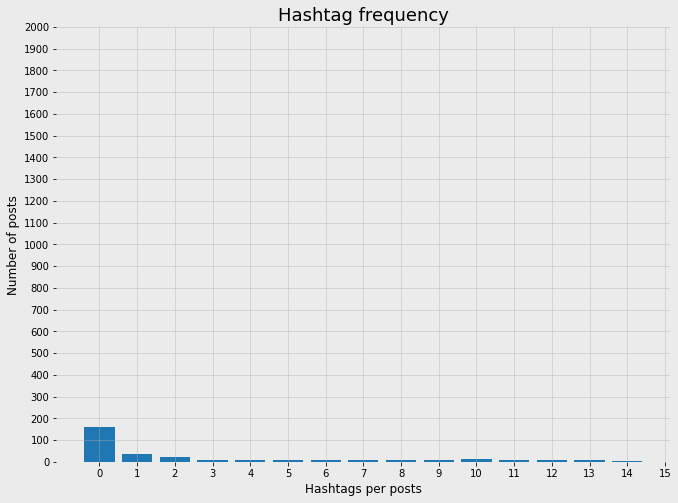

In [377]:
plt.figure(facecolor='#ebebeb', figsize=(11, 8))
plt.bar([x[0] for x in hashtag_summary['hashtag_freq'][:15]],
        [x[1] for x in hashtag_summary['hashtag_freq'][:15]])
plt.title('Hashtag frequency', fontsize=18)
plt.xlabel('Hashtags per posts', fontsize=12)
plt.ylabel('Number of posts', fontsize=12)
plt.xticks(range(16))
plt.yticks(range(0, 2100, 100))
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

You are probably wonderig which are the top hashtags

In [378]:
hashtag_summary['top_hashtags'][:10]

[('#cosmeticsurgery', 25),
 ('#london', 24),
 ('#plasticsurgery', 23),
 ('#beauty', 21),
 ('#aesthetics', 21),
 ('#plasticsurgeon', 16),
 ('#skincare', 16),
 ('#affiliate', 14),
 ('#beautiful', 13),
 ('#botox', 13)]

Visualizing the same data

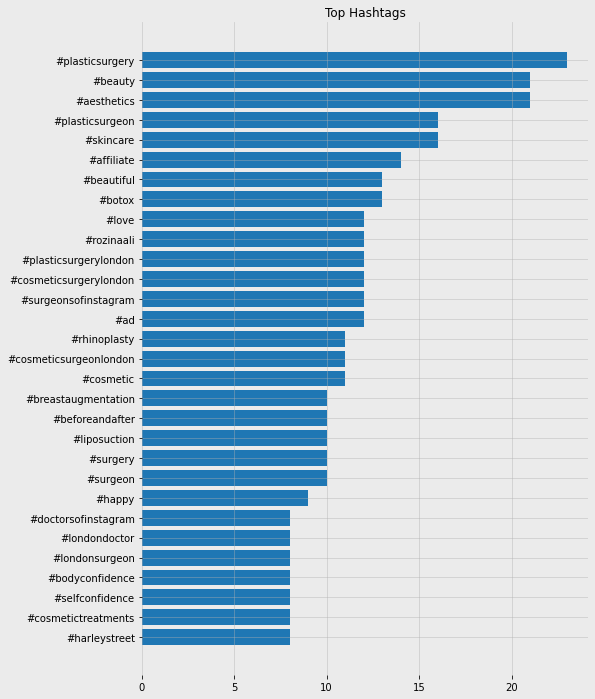

In [379]:
plt.figure(facecolor='#ebebeb', figsize=(8, 12))
plt.barh([x[0] for x in hashtag_summary['top_hashtags'][2:][:30]][::-1],
         [x[1] for x in hashtag_summary['top_hashtags'][2:][:30]][::-1])
plt.title('Top Hashtags')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

#Emoji's

You will see that the extract_emoji function is pretty much the same as extract_hashtags. The only difference is that it has emoji both as images and their textual counterparts.

In [380]:
emoji_summary = adv.extract_emoji(df['caption'])
emoji_summary.keys()

dict_keys(['emoji', 'emoji_text', 'emoji_flat', 'emoji_flat_text', 'emoji_counts', 'emoji_freq', 'top_emoji', 'top_emoji_text', 'top_emoji_groups', 'top_emoji_sub_groups', 'overview'])

In [381]:
emoji_summary['overview']

{'emoji_per_post': 0.9918918918918919,
 'num_emoji': 367,
 'num_posts': 370,
 'unique_emoji': 3}

In [382]:
emoji_summary['emoji'][:20]

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['™'],
 ['™'],
 ['™'],
 [],
 ['™'],
 [],
 [],
 [],
 []]

In [383]:
emoji_summary['emoji_text'][:20]

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['trade mark'],
 ['trade mark'],
 ['trade mark'],
 [],
 ['trade mark'],
 [],
 [],
 [],
 []]

In [384]:
emoji_summary['emoji_flat'][:10]

['™', '™', '™', '™', '™', '™', '©', '®', '©', '™']

In [385]:
emoji_summary['emoji_flat_text'][:10]

['trade mark',
 'trade mark',
 'trade mark',
 'trade mark',
 'trade mark',
 'trade mark',
 'copyright',
 'registered',
 'copyright',
 'trade mark']

In [386]:
list(zip(emoji_summary['emoji_flat'][:10], emoji_summary['emoji_flat_text'][:10]))

[('™', 'trade mark'),
 ('™', 'trade mark'),
 ('™', 'trade mark'),
 ('™', 'trade mark'),
 ('™', 'trade mark'),
 ('™', 'trade mark'),
 ('©', 'copyright'),
 ('®', 'registered'),
 ('©', 'copyright'),
 ('™', 'trade mark')]

In [387]:
emoji_summary['emoji_counts'][:15]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0]

In [388]:
emoji_summary['emoji_freq'][:15]

[(0, 238),
 (1, 81),
 (2, 23),
 (3, 7),
 (4, 13),
 (5, 1),
 (6, 2),
 (8, 1),
 (10, 1),
 (18, 1),
 (50, 1),
 (64, 1)]

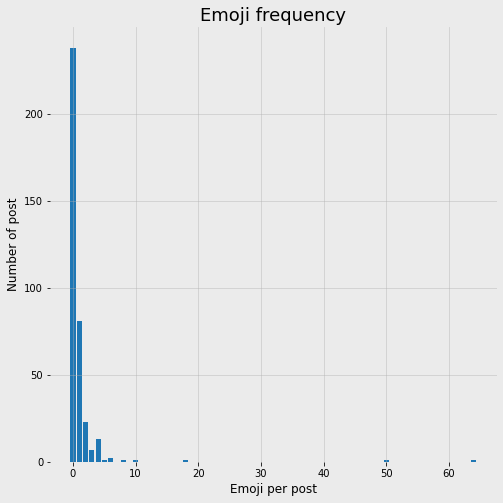

In [389]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.bar([x[0] for x in emoji_summary['emoji_freq'][:15]],
        [x[1] for x in emoji_summary['emoji_freq'][:15]])
plt.title('Emoji frequency', fontsize=18)
plt.xlabel('Emoji per post', fontsize=12)
plt.ylabel('Number of post', fontsize=12)
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [390]:
emoji_summary['top_emoji'][:20]

[('™', 297), ('©', 46), ('®', 24)]

In [391]:
emoji_summary['top_emoji_text'][:20]

[('trade mark', 297), ('copyright', 46), ('registered', 24)]

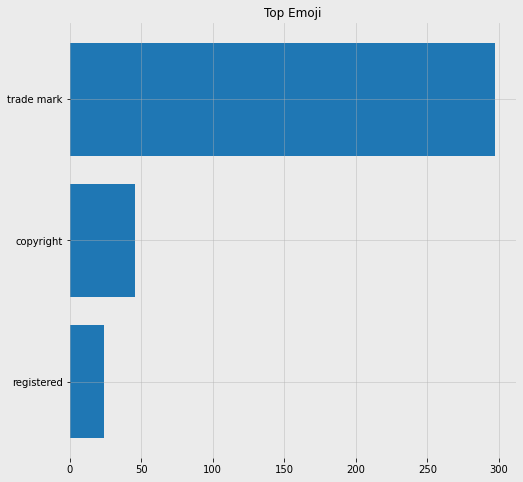

In [392]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.barh([x[0] for x in emoji_summary['top_emoji_text'][:20]][::-1],
         [x[1] for x in emoji_summary['top_emoji_text'][:20]][::-1])
plt.title('Top Emoji')
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

#mentions

In [393]:
mention_summary = adv.extract_mentions(df['caption'])
mention_summary.keys()

dict_keys(['mentions', 'mentions_flat', 'mention_counts', 'mention_freq', 'top_mentions', 'overview'])

In [394]:
mention_summary['overview']

{'mentions_per_post': 0.5108108108108108,
 'num_mentions': 189,
 'num_posts': 370,
 'unique_mentions': 102}

In [395]:
mention_summary['mentions'][:15]

[[],
 [],
 [],
 ['@stayinglevel'],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 ['@coolsculpting'],
 ['@hydrafacial'],
 ['@cosmeticnurse_mariam'],
 ['@hydrafacial', '@hydrafacial']]

In [396]:
mention_summary['mentions_flat'][:10]

['@stayinglevel',
 '@coolsculpting',
 '@hydrafacial',
 '@cosmeticnurse_mariam',
 '@hydrafacial',
 '@hydrafacial',
 '@sciton_inc',
 '@doctify',
 '@remaybeauty',
 '@gettymuseum']

In [397]:
mention_summary['mention_counts'][:20]

[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 1, 0, 0]

In [398]:
mention_summary['mention_freq'][:15]

[(0, 276), (1, 57), (2, 21), (3, 8), (5, 3), (6, 3), (15, 1), (18, 1)]

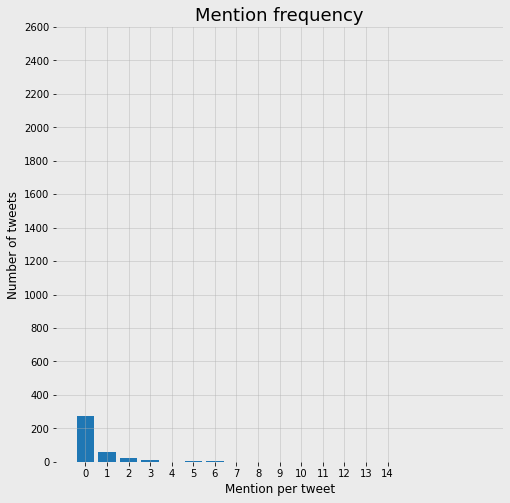

In [399]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.bar([x[0] for x in mention_summary['mention_freq'][:15]],
        [x[1] for x in mention_summary['mention_freq'][:15]])
plt.title('Mention frequency', fontsize=18)
plt.xlabel('Mention per tweet', fontsize=12)
plt.ylabel('Number of tweets', fontsize=12)
plt.xticks(range(15))
plt.yticks(range(0, 2800, 200))
plt.grid(alpha=0.5)
plt.gca().set_frame_on(False)

In [400]:
mention_summary['top_mentions'][:10]

[('@officialnavyprotools', 21),
 ('@officialnavyprofessional', 16),
 ('@nouveaulashespro', 8),
 ('@make_repost', 5),
 ('@facerestorationlondon', 4),
 ('@drjonathanroos', 4),
 ('@phoenixhospitalgroup', 4),
 ('@onewelbeck', 4),
 ('@lanserhof_arts_club', 4),
 ('@mayamypro', 4)]

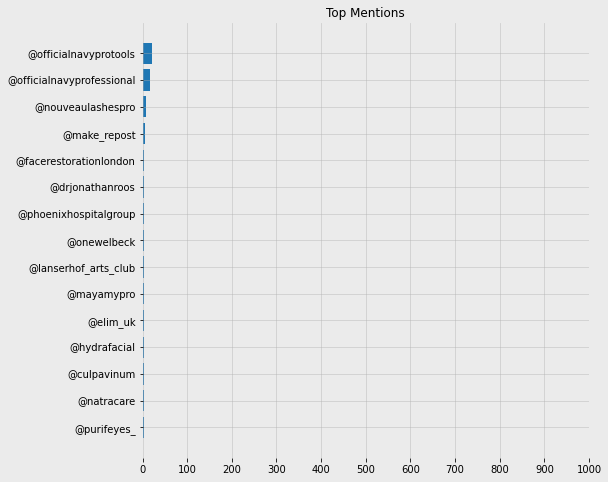

In [401]:
plt.figure(facecolor='#ebebeb', figsize=(8, 8))
plt.barh([x[0] for x in mention_summary['top_mentions'][:15]][::-1],
         [x[1] for x in mention_summary['top_mentions'][:15]][::-1])
plt.title('Top Mentions')
plt.grid(alpha=0.5)
plt.xticks(range(0, 1100, 100))
plt.gca().set_frame_on(False)

#Questions

In [402]:
question_summary = adv.extract_questions(df['caption'])

In [403]:
question_summary.keys()

dict_keys(['question_marks', 'question_marks_flat', 'question_mark_counts', 'question_mark_freq', 'top_question_marks', 'overview', 'question_mark_names', 'question_text'])

In [404]:
question_summary['overview']

{'num_posts': 370,
 'num_question_marks': 71,
 'question_marks_per_post': 0.1918918918918919,
 'unique_question_marks': 2}

In [405]:
question_summary['question_mark_freq']

[(0, 331), (1, 28), (2, 5), (3, 2), (4, 1), (7, 1), (8, 2)]

In [406]:
question_summary['top_question_marks'] # this is more interesting if you have questions in different languages where different question marks are used.

[('?', 40), ('¿', 31)]

In [407]:
[(i,x) for i, x in  enumerate(question_summary['question_text']) if x][:15]

[(12, ['spooky season?']),
 (18,
  ['what has a heart, gives you massages and kisses your skin in the morning?']),
 (25, ['are you looking for a subtle lip filler to enhance lips?']),
 (30,
  ['the combination of fat transfer & breast lift surgery was the perfect match for my client - no more sagging breast for her ðÿ¤©\nwhat do you think of this before & after?']),
 (47,
  ['did you know we also offer video consultations, so you can learn more about your surgery and have your questions answered from the comfort and privacy of your home?']),
 (48, ['could it be your eyes, your mouth or the way that you smile?']),
 (50, ['did you hear?']),
 (73, ['tak co si z nasìœeho rozvozovã©ho menu objednaì�te tentokraì�t?']),
 (97,
  ['if you had the marker pens, which area of your body would you circle?']),
 (102,
  ['ðÿ‘©ðÿ�½â€�âš•ï¸� have you heard about our new private gp service here in south-west london?']),
 (107,
  ['shot and concept: moi, @abiolastudio\nmodels: @culpavinum ðÿ’—ðÿ’—\nzine: 

#Intense Words

In [408]:
intense_summary = adv.extract_intense_words(df['caption'], min_reps=3)

In [409]:
intense_summary['overview']

{'intense_words_per_post': 0.13783783783783785,
 'num_intense_words': 51,
 'num_posts': 370,
 'unique_intense_words': 45}

In [410]:
intense_summary['top_intense_words'][:20]

[('-----------', 5),
 ('111', 3),
 ('#fallleaves', 1),
 ('harder...', 1),
 ('superpower...ðÿ¦¸â€�â™€ï¸�', 1),
 ('-----------------------', 1),
 ('https://www.rozinaali.com/contact', 1),
 ('------', 1),
 ('ð��šð��§ð���', 1),
 ('ð��¨ð��¥ð���', 1),
 ('-----------------', 1),
 ('www.meclinic.com', 1),
 ('~~~~~~~~~~~~~~~~~~~~~~~~~', 1),
 ('~~~~~~~~~~~~~~~~~~~~~~', 1),
 ('mouthguard....', 1),
 ('www.rozvoz.taro.cz', 1),
 ('monday!!!', 1),
 ('christmas...ðÿž¶', 1),
 ('ï½”ï½•ï½ƒï½‹....', 1),
 ('consultation....#notonesizefitsall', 1)]

#Currency Symbols

In [411]:
currency_summary = adv.extract_currency(df['caption'])

In [412]:
currency_summary.keys()

dict_keys(['currency_symbols', 'currency_symbols_flat', 'currency_symbol_counts', 'currency_symbol_freq', 'top_currency_symbols', 'overview', 'currency_symbol_names', 'surrounding_text'])

In [413]:
currency_summary['overview']

{'currency_symbols_per_post': 2.0,
 'num_currency_symbols': 740,
 'num_posts': 370,
 'unique_currency_symbols': 6}

In [414]:
currency_summary['top_currency_symbols']

[('€', 408), ('¢', 104), ('£', 94), ('¤', 86), ('¥', 46), ('$', 2)]

In [415]:
[x for x in currency_summary['surrounding_text'] if x][:20]

[['donâ€™t forget we are off', 'â€¢', 'â€¢', 'â€¢'],
 ['season? no way - itâ€™s hydrafacial seaso'],
 ['â€¢', 'â€¢', 'â€¢'],
 ['â€¢', 'â€¢', 'â€¢'],
 ['smooth shave so youâ€™re ready to go in n'],
 [' day should be sunâ˜€ï¸�day #remayshave #'],
 ['mentation results â�¤ï¸�'],
 ['o superpower...ðÿ¦¸â€�â™€ï¸�'],
 ['â€�ð�˜�ð�˜§ ð�˜ºð�˜°ð�',
  '˜¶ ð�˜¢ð�˜³ð�˜¦ ð�˜´ð�˜¤ð�˜',
  '¦ð�˜±ð�˜µð�˜ªð�˜¤ð�˜¢ð�˜\xad ð�˜¸ð�˜©ð�˜¦ð�˜',
  '¯ ð�˜ªð�˜µ ð�˜¤ð�˜°ð�˜®ð�˜¦ð�˜´ ð�˜',
  'ð�˜©ð�˜¦ð�˜¯ ð�™¡ð�™¤ð�™¤ð�™\xa0 ð�™£ð�™¤ ð�',
  'ð�™ªð�™¨ð�™š ð�™�ð�™¤ð�™¯ð�™žð�™£ð�™– ð�™',
  ' ð�™œð�™ªð�™šð�™šð�™£ ð�™¤ð�™› ð�™›ð�™žð�',
  '™¡ð�™¡ð�™šð�™§ð�™¨!â€� ðÿ‘¸this is one ti'],
 ['s? look no more! ðÿ˜€ '],
 ['of this procedure ðÿ¤©'],
 ['etimes, women just â€œgetâ€� each other. '],
 ['ter the procedure â�¤ï¸�',
  'ð�˜½ð�™¤ð�™¤ð�™\xa0 ð�™– ð�™˜ð�™¤ð�',
  '™£ð�™¨ð�™ªð�™¡ð�™©ð�™–',
  'ð�™©ð�™žð�™¤ð�™£ ðÿ’œ dm or email at'],
 ['ng breast for her ðÿ¤©'],
 ['ð��¡ð��žð��« ð��¨ð��¥ð��� ð�ÿ‘ð�ÿ“ð�ÿžð��',
  'œð��œ ð��¢ð��¦ð��©

In [421]:
extracted_posts =  (df[['account','caption','profile_name',	'biography','following',	'likes','posts_count','followers'	,'is_verified'	,'image_url'	,'url'	,'comments',	'video_view_count'	,'video_url',	'adultScore',	'racyScore'	,'goreScore'	,'isBWImg',	'clipArtType'	,'lineDrawingType',	'tokens',	'Dow',	'Hod','TextBlob_Subjectivity',	'TextBlob_Polarity'	,'TextBlob_Analysis',	'Average_Likes']]
 .assign(hashtags=hashtag_summary['hashtags'],
         hashcounts=hashtag_summary['hashtag_counts'],
         mentions=mention_summary['mentions'],
         mention_count=mention_summary['mention_counts'],
         emoji=emoji_summary['emoji'],
         emoji_text=emoji_summary['emoji_text'],
         emoji_count=emoji_summary['emoji_counts'],))
extracted_posts.head()

,account,caption,profile_name,biography,following,likes,posts_count,followers,is_verified,image_url,url,comments,video_view_count,video_url,adultScore,racyScore,goreScore,isBWImg,clipArtType,lineDrawingType,tokens,Dow,Hod,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,Average_Likes,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count
0,atherton.duncan,3 months post op open rhinoplasty involving a ...,duncan atherton rhinoplasty,"j_globe4 london, uk\nn_building6 co-founder ...",595,63,121,986,0,j_kvihwg0g1c283e3byk.95bb74294d3d322bb266581de...,https://www.instagram.com/p/CQ74H_zLIha/,5,0,nan,0.041418564,0.191116735,0.007061391,0,0,0,"['white', 'black', 'text', 'screenshot', 'grap...",Tuesday,19,0.500000,0.000000,Neutral,41.833333,"[#rhinoplasty, #septorhinoplasty, #tipplasty, ...",13,[],0,[],[],0
1,georgina_bst,"beautiful tulips in bowling green, nyc's oldes...",georgina borneman-street,"j_globe4 london, uk\nn_building6 co-founder ...",304,68,611,1785,0,j_kvihwg0g1c283e3byk.d3b260f90252d61b964194b59...,https://www.instagram.com/p/CSsQs3bFYWI/,0,0,nan,0.001021657,0.001981798,0.000915632,0,0,0,"['grey', 'red', 'building', 'outdoor', 'sky', ...",Tuesday,19,0.455556,0.216667,Positive,58.200000,"[#â, #nyc, #tulips, #yellowcab, #instanewyork,...",14,[],0,[],[],0
2,georgina_bst,times square! â� â� \n.â� â� \n.â� â� \n.â� â�...,georgina borneman-street,"j_globe4 london, uk\nn_building6 co-founder ...",304,128,611,1785,0,j_kvihwg0g1c283e3byk.d3b260f90252d61b964194b59...,https://www.instagram.com/p/CSfabiFp4iI/,3,0,nan,0.001099343,0.001939648,0.000850264,0,0,0,"['grey', 'black', 'outdoor', 'sky', 'building'...",Tuesday,19,0.000000,0.000000,Neutral,58.200000,"[#timessquare, #yellowcab, #instanewyork, #nyl...",12,[],0,[],[],0
3,georgina_bst,home for the last few months #homesweethome \n...,georgina borneman-street,"j_globe4 london, uk\nn_building6 co-founder ...",304,36,611,1785,0,j_kvihwg0g1c283e3byk.d3b260f90252d61b964194b59...,https://www.instagram.com/p/CVtYT8jvnAn/,1,0,nan,0.001089915,0.001977403,0.000755982,0,0,0,"['black', 'white', 'grey', 'outdoor', 'cloud',...",Tuesday,19,0.083333,-0.100000,Negative,58.200000,"[#homesweethome, #vancouver, #britishcolumbia,...",13,[@stayinglevel],1,[],[],0
4,georgina_bst,taking a day off to explore #sanjuancapistrano...,georgina borneman-street,"j_globe4 london, uk\nn_building6 co-founder ...",304,51,611,1785,0,j_kvihwg0g1c283e3byk.d3b260f90252d61b964194b59...,https://www.instagram.com/p/CUsSIA8lgAE/,1,0,nan,0.001092771,0.00185857,0.000695697,0,0,0,"['blue', 'grey', 'black', 'outdoor', 'sky', 't...",Tuesday,19,0.250000,0.068182,Positive,58.200000,"[#sanjuancapistrano, #aug2021, #historic, #los...",24,[],0,[],[],0


The dataset is imbalanced

A) Understanding the common words used in the captions: WordCloud

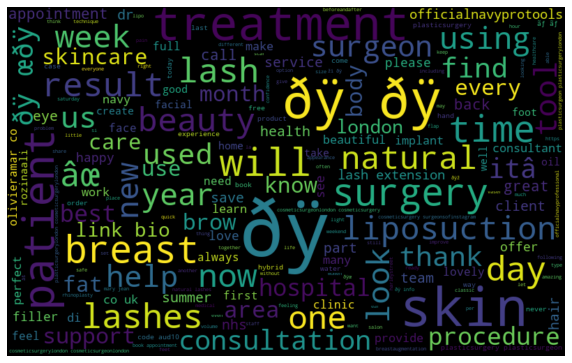

In [422]:
all_words = ' '.join([text for text in df['caption']]) 
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

Understanding the common words used in the Positive captions: WordCloud

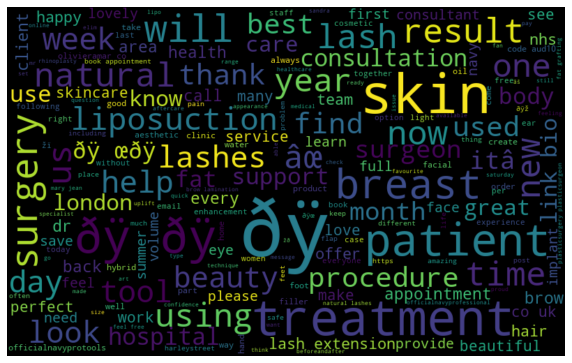

In [423]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
normal_words =' '.join([text for text in df['caption'][df['TextBlob_Analysis'] == 'Positive']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Understanding the common words used in the Negative captions: WordCloud

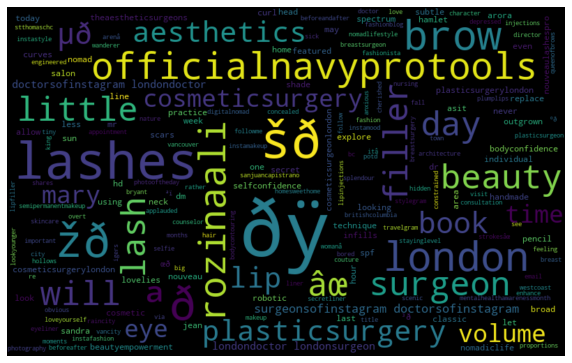

In [424]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
normal_words =' '.join([text for text in df['caption'][df['TextBlob_Analysis'] == 'Negative']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Understanding the common words used in the Neutral captions: WordCloud

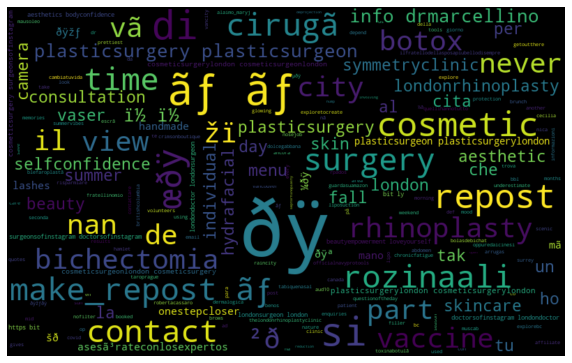

In [425]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud
normal_words =' '.join([text for text in df['caption'][df['TextBlob_Analysis'] == 'Neutral']]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [426]:
def hashtag_extract1(x):
    hashtags = []
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags

In [427]:
HT_positive = hashtag_extract1(df['caption'][df['TextBlob_Analysis'] == 'Positive'])

In [429]:
HT_negative = hashtag_extract1(df['caption'][df['TextBlob_Analysis'] == 'Negative'])

In [430]:
HT_neutral = hashtag_extract1(df['caption'][df['TextBlob_Analysis'] == 'Neutral'])

In [431]:
HT_positive = sum(HT_positive,[]) 
HT_negative = sum(HT_negative,[])
HT_neutral = sum(HT_neutral,[])

Let's plot the top ‘n’ hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

In [432]:
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame(
    {
    'Hashtag': list(a.keys()),
    'Count': list(a.values())
    }
)

selecting top 20 most frequent hashtags in Positive hashtags

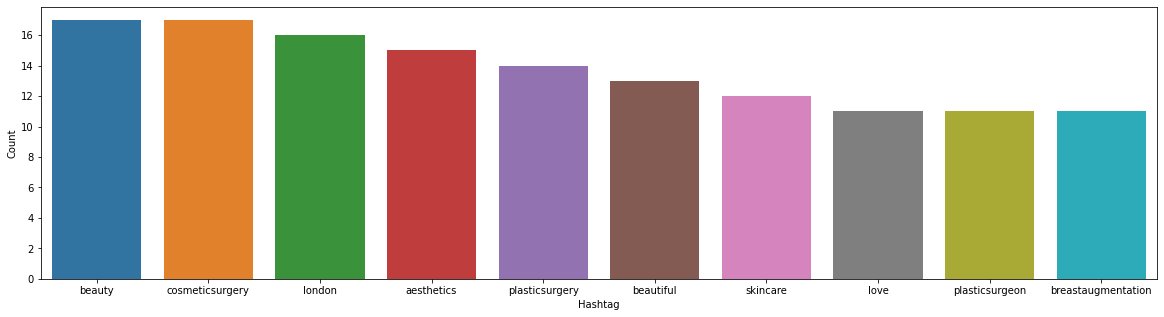

In [433]:
import seaborn as sns 

d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

selecting top 20 most frequent hashtags in Negative hashtags

In [434]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame(
    {
    'Hashtag': list(a.keys()),
    'Count': list(a.values())
    }
)

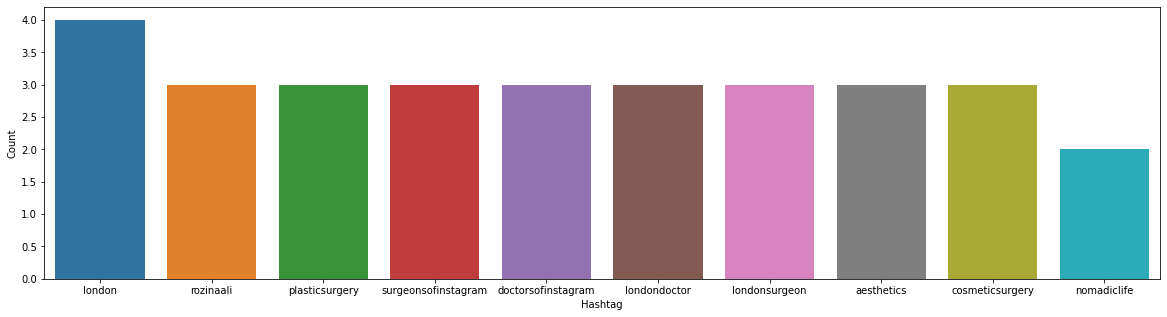

In [435]:
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

selecting top 20 most frequent hashtags in Neutral hashtags

In [436]:
a = nltk.FreqDist(HT_neutral)
d = pd.DataFrame(
    {
    'Hashtag': list(a.keys()),
    'Count': list(a.values())
    }
)

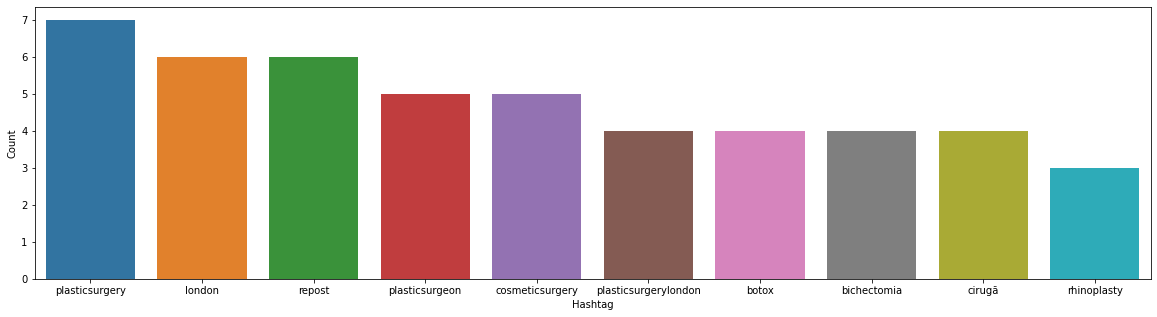

In [437]:
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(20,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

###Bag of words Features

In [438]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(df['caption'])
bow.shape

(370, 1000)

##TFIDF

In [439]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['caption'])
tfidf.shape

(370, 1000)

##Word2Vec Features

In [442]:
import gensim 

tokenized_post = df['caption'].apply(lambda x: x.split()) # tokenizing 
model_w2v = gensim.models.Word2Vec(tokenized_post,
            size=200, # desired no. of features/independent variables
            window=5, # context window size
            min_count=2, # Ignores all words with total frequency lower than 2.                                  
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 32, # no.of cores
            seed = 34
)
model_w2v.train(tokenized_post, total_examples= len(df['caption']), epochs=20)

2022-02-06 01:06:05,559 | INFO | word2vec.py:1567 | scan_vocab | collecting all words and their counts
2022-02-06 01:06:05,576 | INFO | word2vec.py:1552 | _scan_vocab | PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-02-06 01:06:05,601 | INFO | word2vec.py:1575 | scan_vocab | collected 6099 word types from a corpus of 18481 raw words and 370 sentences
2022-02-06 01:06:05,618 | INFO | word2vec.py:1626 | prepare_vocab | Loading a fresh vocabulary
2022-02-06 01:06:05,656 | INFO | word2vec.py:1650 | prepare_vocab | effective_min_count=2 retains 2017 unique words (33% of original 6099, drops 4082)
2022-02-06 01:06:05,671 | INFO | word2vec.py:1656 | prepare_vocab | effective_min_count=2 leaves 14399 word corpus (77% of original 18481, drops 4082)
2022-02-06 01:06:05,709 | INFO | word2vec.py:1715 | prepare_vocab | deleting the raw counts dictionary of 6099 items
2022-02-06 01:06:05,722 | INFO | word2vec.py:1718 | prepare_vocab | sample=0.001 downsamples 44 most-common w

(227774, 369620)

In [443]:
model_w2v.wv.most_similar(positive="beauty")

2022-02-06 01:06:19,461 | INFO | keyedvectors.py:1360 | init_sims | precomputing L2-norms of word weight vectors


[('business', 0.9145185351371765),
 ('becoming', 0.8965675234794617),
 ('ðÿ•š', 0.8850090503692627),
 ('fluffy', 0.8844465017318726),
 ('being', 0.8842158913612366),
 ('best', 0.8806491494178772),
 ('ðÿž„', 0.8780860304832458),
 ('industry', 0.8730828166007996),
 ('quality', 0.8695405125617981),
 ('suit', 0.8627330660820007)]

### Preparing vectors for tweet

Since our data contains tweets and not just words, we’ll have to figure out a way to use the word vectors from word2vec model to create vector representation for an entire tweet. There is a simple solution to this problem, we can simply take mean of all the word vectors present in the tweet. The length of the resultant vector will be the same, i.e. 200. We will repeat the same process for all the tweets in our data and obtain their vectors. Now we have 200 word2vec features for our data.

We will use the below function to create a vector for each tweet by taking the average of the vectors of the words present in the tweet.

In [444]:
def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v[word].reshape((1, size))
            count += 1.
        except KeyError:
            continue
    if count != 0:
        vec /= count
    return vec

Preparing word2vec feature set

In [445]:
wordvec_arrays = np.zeros((len(tokenized_post), 200)) 
for i in range(len(tokenized_post)):
    wordvec_arrays[i,:] = word_vector(tokenized_post[i], 200)
wordvec_df = pd.DataFrame(wordvec_arrays)
wordvec_df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


(370, 200)

Now we have 200 new features, whereas in Bag of Words and TF-IDF we had 1000 features.

#Modelling